In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'default-of-credit-card-clients-dataset' dataset.
Path to dataset files: /kaggle/input/default-of-credit-card-clients-dataset


In [ ]:
import os

In [ ]:
print(os.listdir(path))

['UCI_Credit_Card.csv']


In [ ]:
import pandas as pd

In [ ]:
uci = pd.read_csv(os.path.join(path, 'UCI_Credit_Card.csv'))

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# Preprocessing & Modeling (for later)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

print("✓ All libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✓ All libraries imported successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
df = uci.copy()

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0000,3102.0000,689.0000,0.0000,0.0000,0.0000,0.0000,689.0000,0.0000,0.0000,0.0000,0.0000,1
1,2,120000.0000,2,2,2,26,-1,2,0,0,0,2,2682.0000,1725.0000,2682.0000,3272.0000,3455.0000,3261.0000,0.0000,1000.0000,1000.0000,1000.0000,0.0000,2000.0000,1
2,3,90000.0000,2,2,2,34,0,0,0,0,0,0,29239.0000,14027.0000,13559.0000,14331.0000,14948.0000,15549.0000,1518.0000,1500.0000,1000.0000,1000.0000,1000.0000,5000.0000,0
3,4,50000.0000,2,2,1,37,0,0,0,0,0,0,46990.0000,48233.0000,49291.0000,28314.0000,28959.0000,29547.0000,2000.0000,2019.0000,1200.0000,1100.0000,1069.0000,1000.0000,0
4,5,50000.0000,1,2,1,57,-1,0,-1,0,0,0,8617.0000,5670.0000,35835.0000,20940.0000,19146.0000,19131.0000,2000.0000,36681.0000,10000.0000,9000.0000,689.0000,679.0000,0


In [ ]:
print(f"\nColumn names:")
print(df.columns.tolist())


Column names:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [ ]:
info_df = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values,
    'Non-Null': df.count().values,
    'Null': df.isnull().sum().values,
    'Null %': (df.isnull().sum() / len(df) * 100).values,
    'Unique': df.nunique().values,
})

print(info_df.to_string(index=False))

                    Column    Type  Non-Null  Null  Null %  Unique
                        ID   int64     30000     0  0.0000   30000
                 LIMIT_BAL float64     30000     0  0.0000      81
                       SEX   int64     30000     0  0.0000       2
                 EDUCATION   int64     30000     0  0.0000       7
                  MARRIAGE   int64     30000     0  0.0000       4
                       AGE   int64     30000     0  0.0000      56
                     PAY_0   int64     30000     0  0.0000      11
                     PAY_2   int64     30000     0  0.0000      11
                     PAY_3   int64     30000     0  0.0000      11
                     PAY_4   int64     30000     0  0.0000      11
                     PAY_5   int64     30000     0  0.0000      10
                     PAY_6   int64     30000     0  0.0000      10
                 BILL_AMT1 float64     30000     0  0.0000   22723
                 BILL_AMT2 float64     30000     0  0.0000   2

In [ ]:
target_counts = df['default.payment.next.month'].value_counts()
target_pct = df['default.payment.next.month'].value_counts(normalize=True) * 100

In [ ]:

print(f"\nClass 0 (No Default): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"Class 1 (Default):    {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: {target_counts[0] / target_counts[1]:.2f}:1")


Class 0 (No Default): 23,364 (77.88%)
Class 1 (Default):    6,636 (22.12%)

Class Imbalance Ratio: 3.52:1


In [ ]:
issues = []

# Check for duplicate IDs
if df['ID'].duplicated().any():
    issues.append(f"⚠ {df['ID'].duplicated().sum()} duplicate IDs found")
else:
    issues.append("✓ No duplicate IDs")



In [ ]:
issues

['✓ No duplicate IDs']

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col.startswith('BILL_AMT') or col.startswith('PAY_AMT'):
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            issues.append(f"⚠ {col}: {neg_count} negative values ({neg_count/len(df)*100:.2f}%)")


In [ ]:
# Check for invalid education codes (0, 5, 6 are undocumented)
if (df['EDUCATION'].isin([0, 5, 6])).any():
    invalid_edu = df['EDUCATION'].isin([0, 5, 6]).sum()
    issues.append(f"⚠ EDUCATION: {invalid_edu} invalid codes (0, 5, 6) - {invalid_edu/len(df)*100:.2f}%")

# Check for invalid marriage codes (0 is undocumented)
if (df['MARRIAGE'] == 0).any():
    invalid_mar = (df['MARRIAGE'] == 0).sum()
    issues.append(f"⚠ MARRIAGE: {invalid_mar} invalid codes (0) - {invalid_mar/len(df)*100:.2f}%")


In [ ]:
# Check age range
age_issues = ((df['AGE'] < 18) | (df['AGE'] > 100)).sum()
if age_issues > 0:
    issues.append(f"⚠ AGE: {age_issues} values outside [18, 100]")
else:
    issues.append("✓ All ages within valid range")

for issue in issues:
    print(issue)

✓ No duplicate IDs
⚠ BILL_AMT1: 590 negative values (1.97%)
⚠ BILL_AMT2: 669 negative values (2.23%)
⚠ BILL_AMT3: 655 negative values (2.18%)
⚠ BILL_AMT4: 675 negative values (2.25%)
⚠ BILL_AMT5: 655 negative values (2.18%)
⚠ BILL_AMT6: 688 negative values (2.29%)
⚠ EDUCATION: 345 invalid codes (0, 5, 6) - 1.15%
⚠ MARRIAGE: 54 invalid codes (0) - 0.18%
✓ All ages within valid range



SECTION 2: DATA TYPES & MEMORY USAGE
                    Column Data_Type  Non_Null_Count  Null_Count  Null_Percentage  Unique_Values  Memory_KB
                        ID     int64           30000           0           0.0000          30000   234.3800
                 LIMIT_BAL   float64           30000           0           0.0000             81   234.3800
                       SEX     int64           30000           0           0.0000              2   234.3800
                 EDUCATION     int64           30000           0           0.0000              7   234.3800
                  MARRIAGE     int64           30000           0           0.0000              4   234.3800
                       AGE     int64           30000           0           0.0000             56   234.3800
                     PAY_0     int64           30000           0           0.0000             11   234.3800
                     PAY_2     int64           30000           0           0.0000             11  

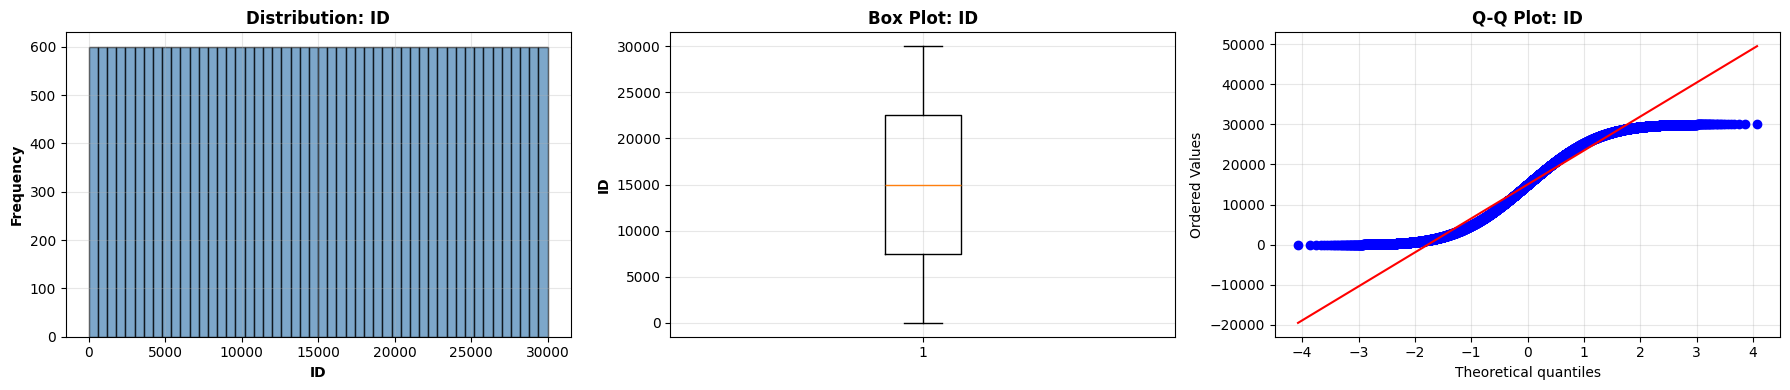


COLUMN: LIMIT_BAL
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 81

--- Basic Statistics ---
Mean: 167484.3227
Median: 140000.0000
Std Dev: 129747.6616
Min: 10000.0000
25th Percentile: 50000.0000
75th Percentile: 240000.0000
Max: 1000000.0000
Range: 990000.0000
IQR: 190000.0000
Skewness: 0.9929
Kurtosis: 0.5363
Zero values: 0 (0.00%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
      Value  Count  Percentage
 50000.0000   3365     11.2167
 20000.0000   1976      6.5867
 30000.0000   1610      5.3667
 80000.0000   1567      5.2233
200000.0000   1528      5.0933
150000.0000   1110      3.7000
100000.0000   1048      3.4933
180000.0000    995      3.3167
360000.0000    881      2.9367
 60000.0000    825      2.7500
140000.0000    749      2.4967
230000.0000    737      2.4567
 70000.0000    731      2.4367
210000.0000    730      2.4333
130000.0000    729      2.4300
120000.0000    726      2.4200
500000.0000    722      2.406

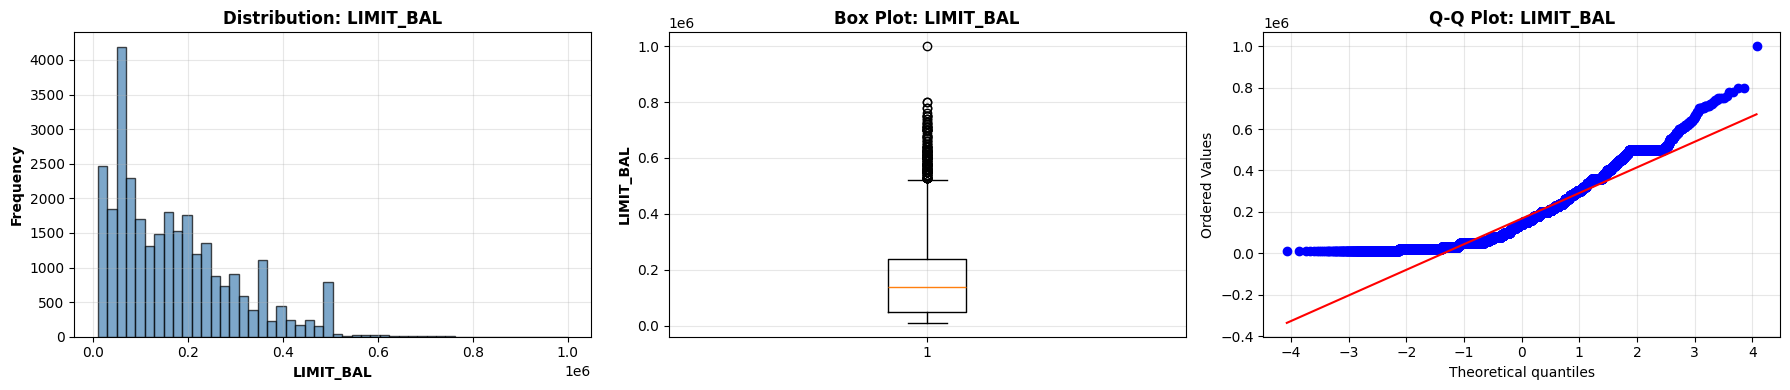


COLUMN: SEX
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 2

--- Basic Statistics ---
Mean: 1.6037
Median: 2.0000
Std Dev: 0.4891
Min: 1.0000
25th Percentile: 1.0000
75th Percentile: 2.0000
Max: 2.0000
Range: 1.0000
IQR: 1.0000
Skewness: -0.4242
Kurtosis: -1.8202
Zero values: 0 (0.00%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     2  18112     60.3733
     1  11888     39.6267


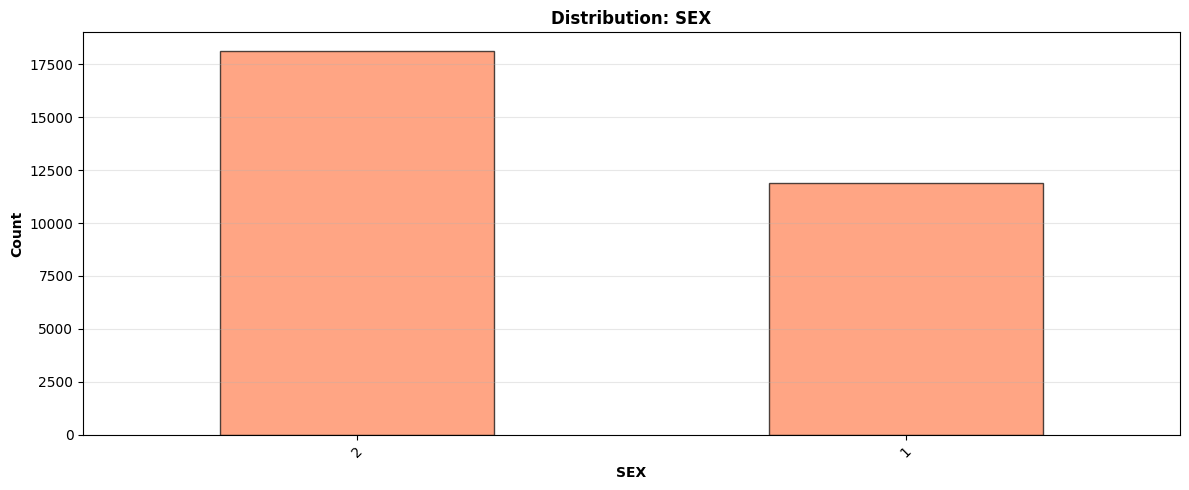


COLUMN: EDUCATION
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 7

--- Basic Statistics ---
Mean: 1.8531
Median: 2.0000
Std Dev: 0.7903
Min: 0.0000
25th Percentile: 1.0000
75th Percentile: 2.0000
Max: 6.0000
Range: 6.0000
IQR: 1.0000
Skewness: 0.9710
Kurtosis: 2.0786
Zero values: 14 (0.05%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     2  14030     46.7667
     1  10585     35.2833
     3   4917     16.3900
     5    280      0.9333
     4    123      0.4100
     6     51      0.1700
     0     14      0.0467


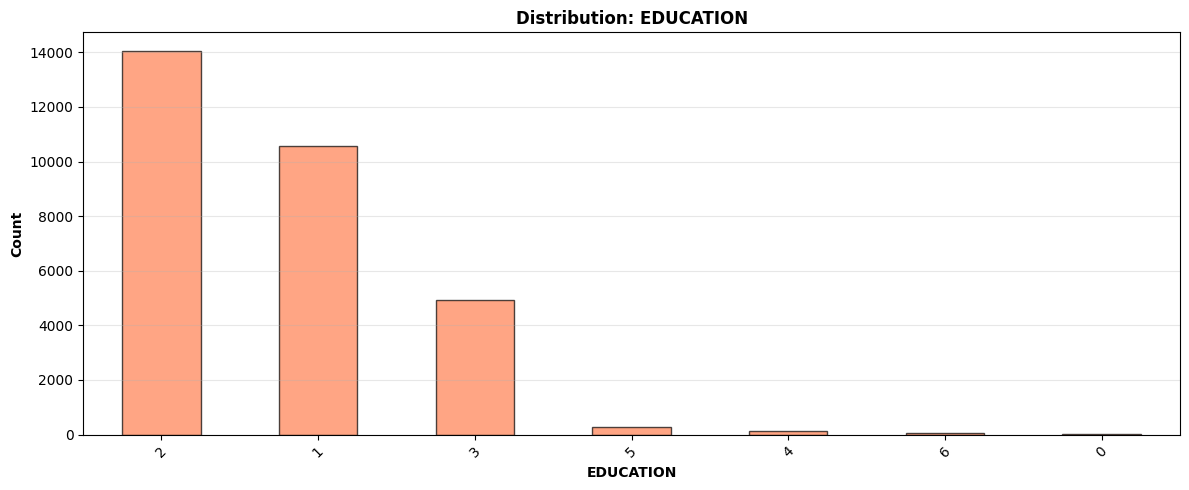


COLUMN: MARRIAGE
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 4

--- Basic Statistics ---
Mean: 1.5519
Median: 2.0000
Std Dev: 0.5220
Min: 0.0000
25th Percentile: 1.0000
75th Percentile: 2.0000
Max: 3.0000
Range: 3.0000
IQR: 1.0000
Skewness: -0.0187
Kurtosis: -1.3634
Zero values: 54 (0.18%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     2  15964     53.2133
     1  13659     45.5300
     3    323      1.0767
     0     54      0.1800


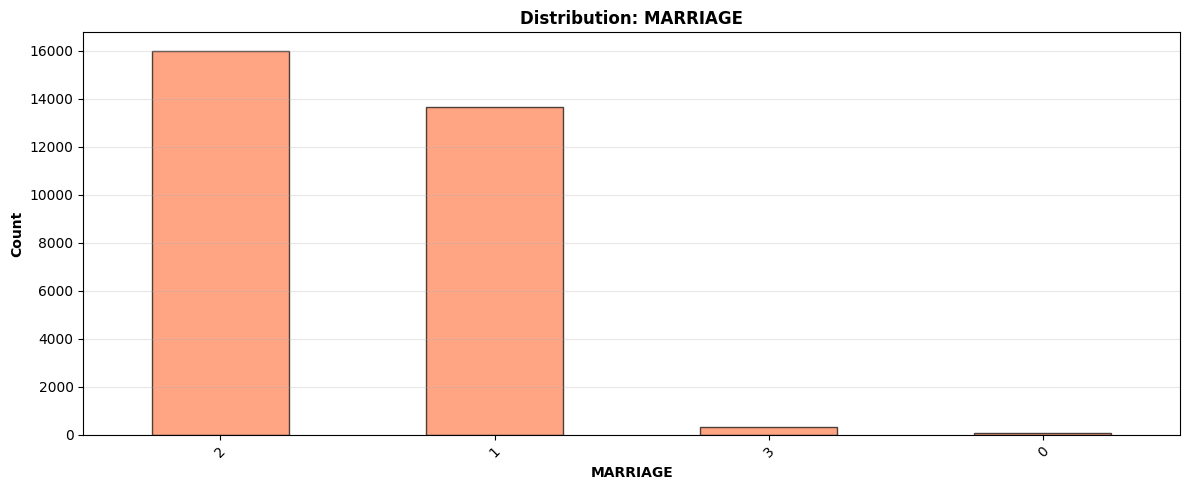


COLUMN: AGE
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 56

--- Basic Statistics ---
Mean: 35.4855
Median: 34.0000
Std Dev: 9.2179
Min: 21.0000
25th Percentile: 28.0000
75th Percentile: 41.0000
Max: 79.0000
Range: 58.0000
IQR: 13.0000
Skewness: 0.7322
Kurtosis: 0.0443
Zero values: 0 (0.00%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
    29   1605      5.3500
    27   1477      4.9233
    28   1409      4.6967
    30   1395      4.6500
    26   1256      4.1867
    31   1217      4.0567
    25   1186      3.9533
    34   1162      3.8733
    32   1158      3.8600
    33   1146      3.8200
    24   1127      3.7567
    35   1113      3.7100
    36   1108      3.6933
    37   1041      3.4700
    39    954      3.1800
    38    944      3.1467
    23    931      3.1033
    40    870      2.9000
    41    824      2.7467
    42    794      2.6467


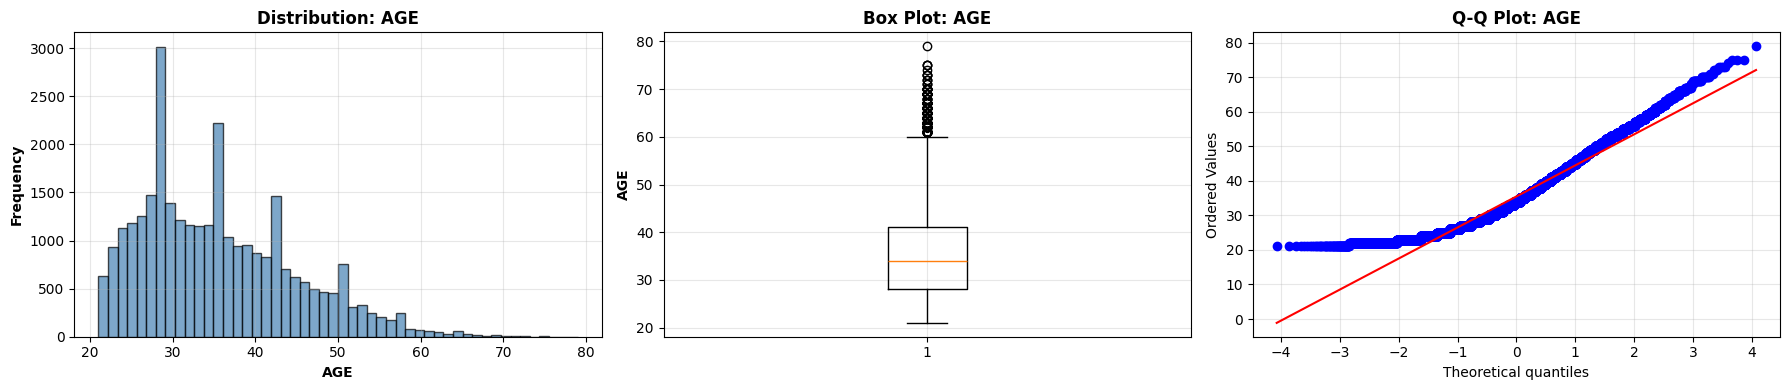


COLUMN: PAY_0
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 11

--- Basic Statistics ---
Mean: -0.0167
Median: 0.0000
Std Dev: 1.1238
Min: -2.0000
25th Percentile: -1.0000
75th Percentile: 0.0000
Max: 8.0000
Range: 10.0000
IQR: 1.0000
Skewness: 0.7320
Kurtosis: 2.7207
Zero values: 14,737 (49.12%)
Negative values: 8,445 (28.15%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  14737     49.1233
    -1   5686     18.9533
     1   3688     12.2933
    -2   2759      9.1967
     2   2667      8.8900
     3    322      1.0733
     4     76      0.2533
     5     26      0.0867
     8     19      0.0633
     6     11      0.0367
     7      9      0.0300


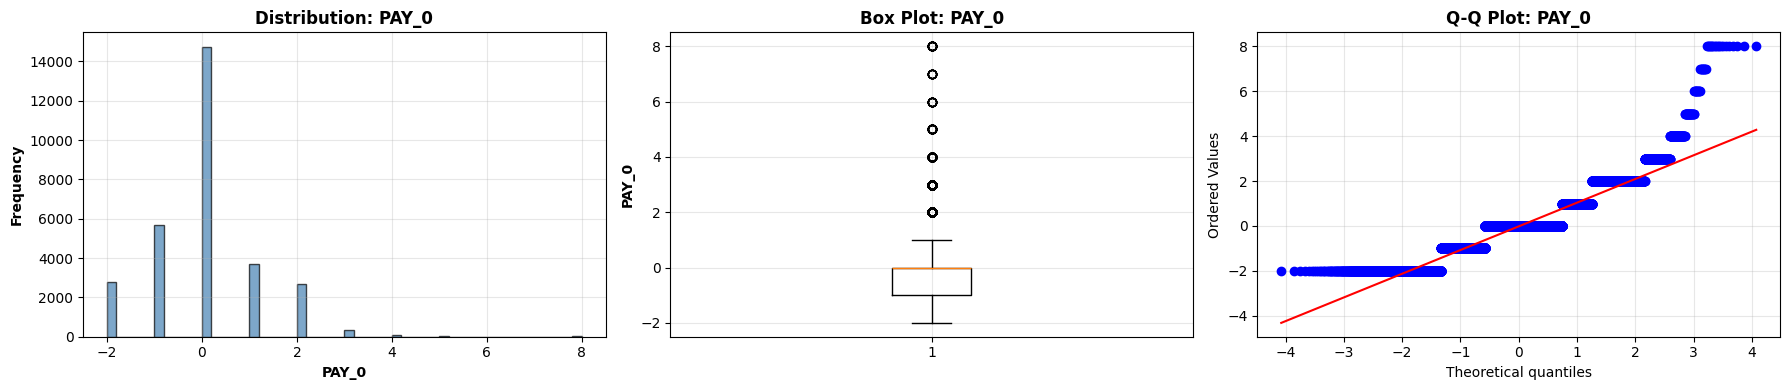


COLUMN: PAY_2
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 11

--- Basic Statistics ---
Mean: -0.1338
Median: 0.0000
Std Dev: 1.1972
Min: -2.0000
25th Percentile: -1.0000
75th Percentile: 0.0000
Max: 8.0000
Range: 10.0000
IQR: 1.0000
Skewness: 0.7906
Kurtosis: 1.5704
Zero values: 15,730 (52.43%)
Negative values: 9,832 (32.77%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  15730     52.4333
    -1   6050     20.1667
     2   3927     13.0900
    -2   3782     12.6067
     3    326      1.0867
     4     99      0.3300
     1     28      0.0933
     5     25      0.0833
     7     20      0.0667
     6     12      0.0400
     8      1      0.0033


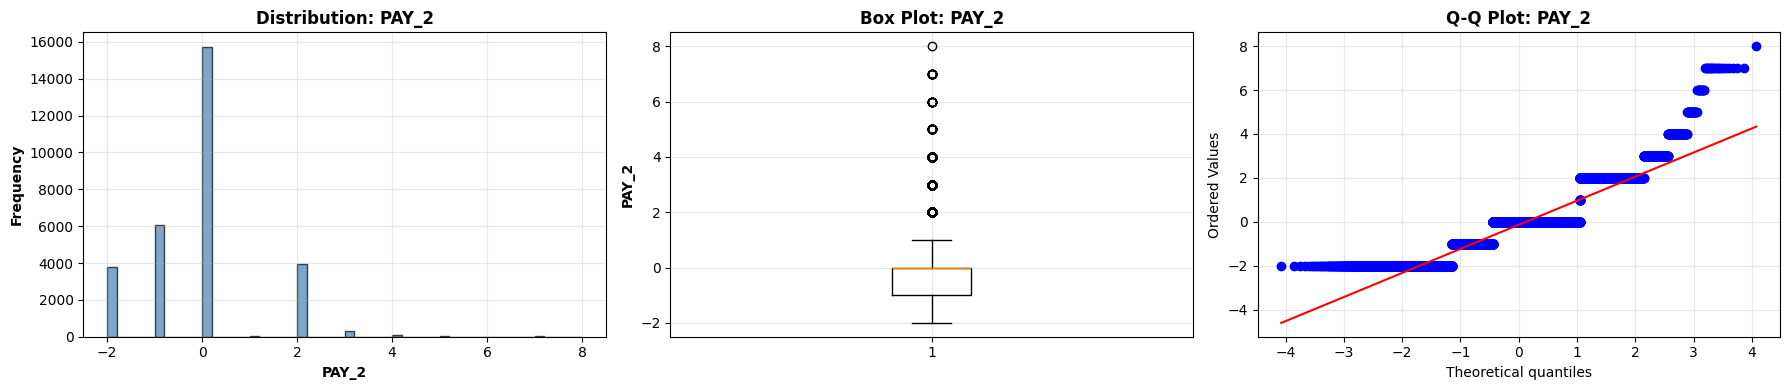


COLUMN: PAY_3
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 11

--- Basic Statistics ---
Mean: -0.1662
Median: 0.0000
Std Dev: 1.1969
Min: -2.0000
25th Percentile: -1.0000
75th Percentile: 0.0000
Max: 8.0000
Range: 10.0000
IQR: 1.0000
Skewness: 0.8407
Kurtosis: 2.0844
Zero values: 15,764 (52.55%)
Negative values: 10,023 (33.41%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  15764     52.5467
    -1   5938     19.7933
    -2   4085     13.6167
     2   3819     12.7300
     3    240      0.8000
     4     76      0.2533
     7     27      0.0900
     6     23      0.0767
     5     21      0.0700
     1      4      0.0133
     8      3      0.0100


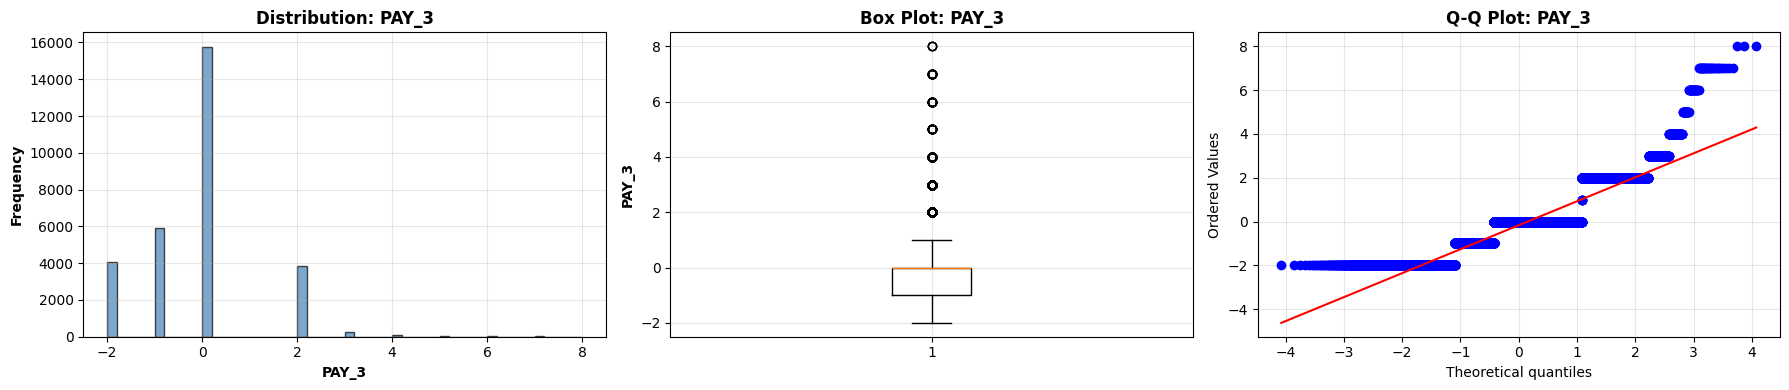


COLUMN: PAY_4
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 11

--- Basic Statistics ---
Mean: -0.2207
Median: 0.0000
Std Dev: 1.1691
Min: -2.0000
25th Percentile: -1.0000
75th Percentile: 0.0000
Max: 8.0000
Range: 10.0000
IQR: 1.0000
Skewness: 0.9996
Kurtosis: 3.4970
Zero values: 16,455 (54.85%)
Negative values: 10,035 (33.45%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  16455     54.8500
    -1   5687     18.9567
    -2   4348     14.4933
     2   3159     10.5300
     3    180      0.6000
     4     69      0.2300
     7     58      0.1933
     5     35      0.1167
     6      5      0.0167
     1      2      0.0067
     8      2      0.0067


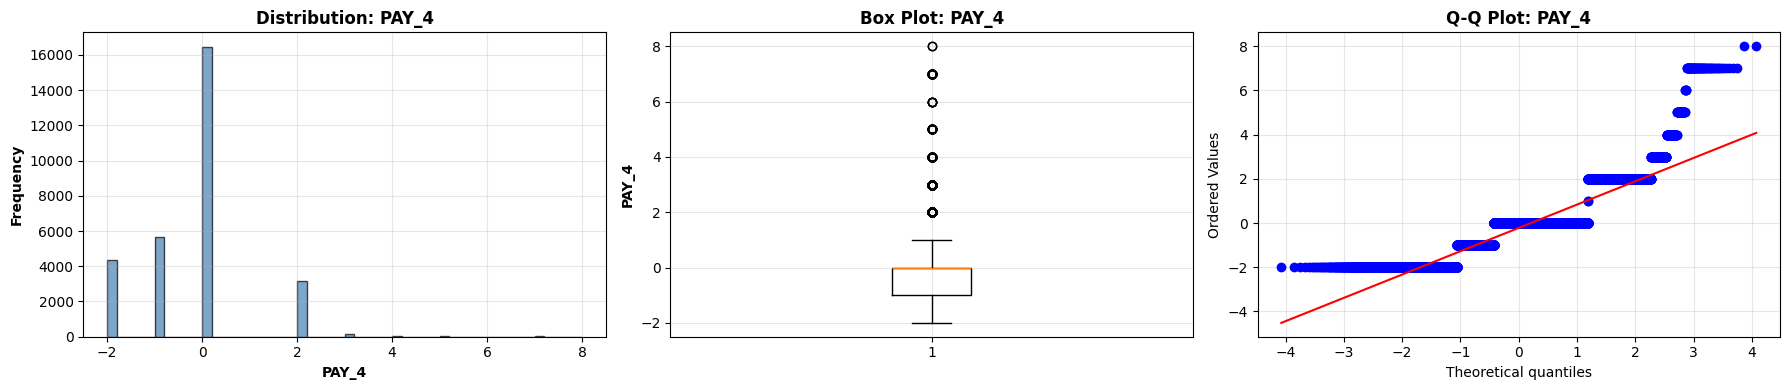


COLUMN: PAY_5
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 10

--- Basic Statistics ---
Mean: -0.2662
Median: 0.0000
Std Dev: 1.1332
Min: -2.0000
25th Percentile: -1.0000
75th Percentile: 0.0000
Max: 8.0000
Range: 10.0000
IQR: 1.0000
Skewness: 1.0082
Kurtosis: 3.9897
Zero values: 16,947 (56.49%)
Negative values: 10,085 (33.62%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  16947     56.4900
    -1   5539     18.4633
    -2   4546     15.1533
     2   2626      8.7533
     3    178      0.5933
     4     84      0.2800
     7     58      0.1933
     5     17      0.0567
     6      4      0.0133
     8      1      0.0033


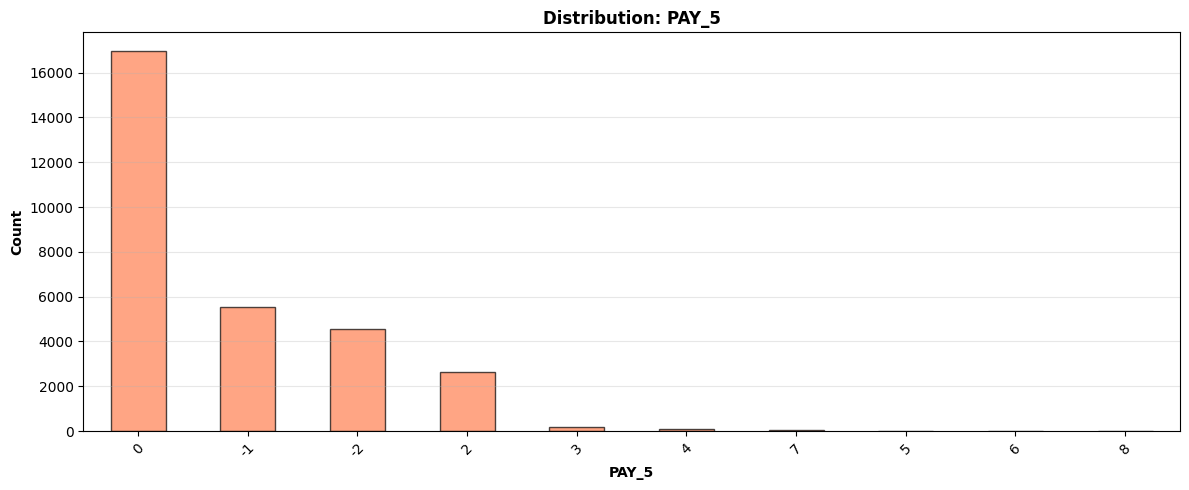


COLUMN: PAY_6
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 10

--- Basic Statistics ---
Mean: -0.2911
Median: 0.0000
Std Dev: 1.1500
Min: -2.0000
25th Percentile: -1.0000
75th Percentile: 0.0000
Max: 8.0000
Range: 10.0000
IQR: 1.0000
Skewness: 0.9480
Kurtosis: 3.4265
Zero values: 16,286 (54.29%)
Negative values: 10,635 (35.45%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  16286     54.2867
    -1   5740     19.1333
    -2   4895     16.3167
     2   2766      9.2200
     3    184      0.6133
     4     49      0.1633
     7     46      0.1533
     6     19      0.0633
     5     13      0.0433
     8      2      0.0067


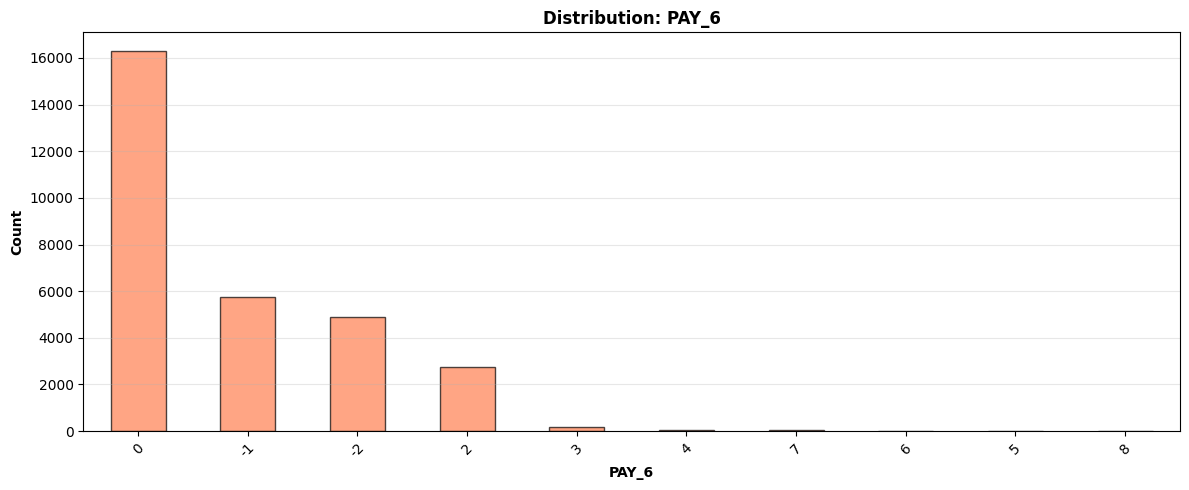


COLUMN: BILL_AMT1
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 22,723

--- Basic Statistics ---
Mean: 51223.3309
Median: 22381.5000
Std Dev: 73635.8606
Min: -165580.0000
25th Percentile: 3558.7500
75th Percentile: 67091.0000
Max: 964511.0000
Range: 1130091.0000
IQR: 63532.2500
Skewness: 2.6639
Kurtosis: 9.8063
Zero values: 2,008 (6.69%)
Negative values: 590 (1.97%)

--- Value Distribution (Top 20) ---
    Value  Count  Percentage
   0.0000   2008      6.6933
 390.0000    244      0.8133
 780.0000     76      0.2533
 326.0000     72      0.2400
 316.0000     63      0.2100
2500.0000     59      0.1967
 396.0000     49      0.1633
2400.0000     39      0.1300
 416.0000     29      0.0967
1050.0000     25      0.0833
 500.0000     25      0.0833
1473.0000     24      0.0800
  -5.0000     22      0.0733
-200.0000     22      0.0733
1261.0000     22      0.0733
 836.0000     21      0.0700
 264.0000     20      0.0667
 291.0000     19      0.0633

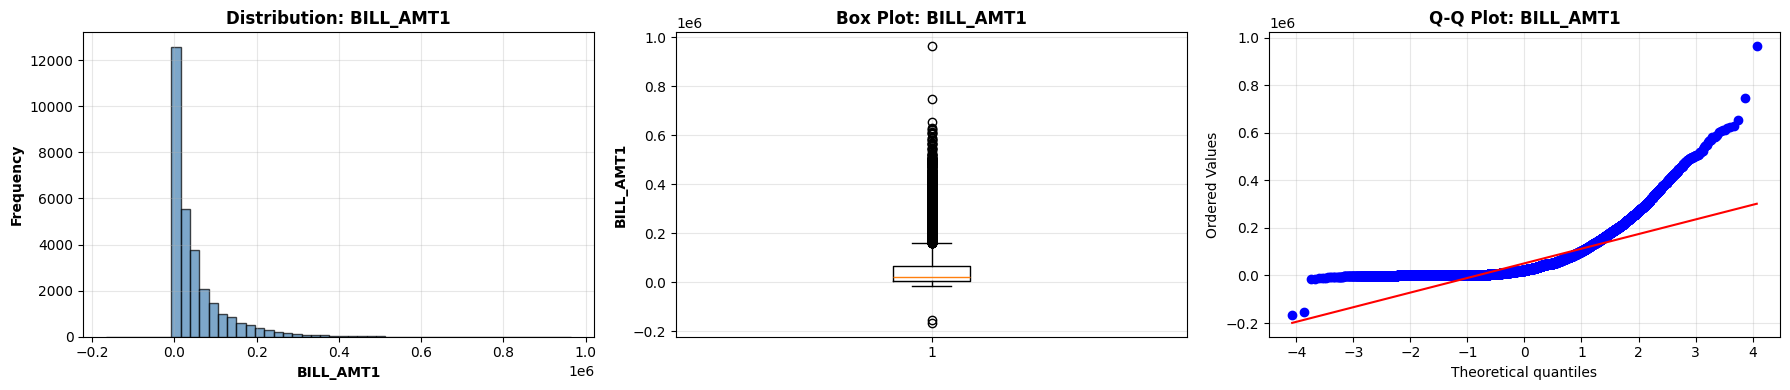


COLUMN: BILL_AMT2
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 22,346

--- Basic Statistics ---
Mean: 49179.0752
Median: 21200.0000
Std Dev: 71173.7688
Min: -69777.0000
25th Percentile: 2984.7500
75th Percentile: 64006.2500
Max: 983931.0000
Range: 1053708.0000
IQR: 61021.5000
Skewness: 2.7052
Kurtosis: 10.3029
Zero values: 2,506 (8.35%)
Negative values: 669 (2.23%)

--- Value Distribution (Top 20) ---
    Value  Count  Percentage
   0.0000   2506      8.3533
 390.0000    231      0.7700
 780.0000     75      0.2500
 326.0000     75      0.2500
 316.0000     72      0.2400
 396.0000     51      0.1700
2500.0000     51      0.1700
2400.0000     42      0.1400
-200.0000     29      0.0967
 416.0000     28      0.0933
1050.0000     25      0.0833
1261.0000     24      0.0800
1000.0000     23      0.0767
1473.0000     23      0.0767
 264.0000     22      0.0733
 291.0000     22      0.0733
  -2.0000     21      0.0700
  -3.0000     21      0.0700

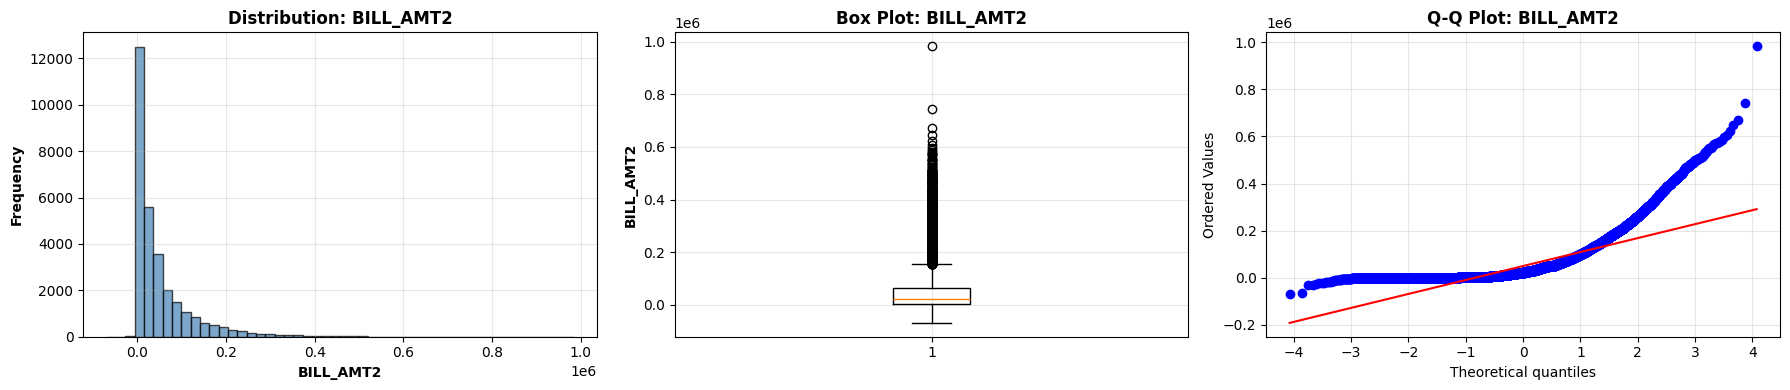


COLUMN: BILL_AMT3
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 22,026

--- Basic Statistics ---
Mean: 47013.1548
Median: 20088.5000
Std Dev: 69349.3874
Min: -157264.0000
25th Percentile: 2666.2500
75th Percentile: 60164.7500
Max: 1664089.0000
Range: 1821353.0000
IQR: 57498.5000
Skewness: 3.0878
Kurtosis: 19.7833
Zero values: 2,870 (9.57%)
Negative values: 655 (2.18%)

--- Value Distribution (Top 20) ---
    Value  Count  Percentage
   0.0000   2870      9.5667
 390.0000    275      0.9167
 780.0000     74      0.2467
 326.0000     63      0.2100
 316.0000     62      0.2067
 396.0000     48      0.1600
2500.0000     40      0.1333
2400.0000     39      0.1300
 416.0000     29      0.0967
 200.0000     27      0.0900
1000.0000     25      0.0833
  -1.0000     24      0.0800
 500.0000     23      0.0767
-200.0000     23      0.0767
 291.0000     23      0.0767
 264.0000     23      0.0767
1050.0000     22      0.0733
  -2.0000     22      0.07

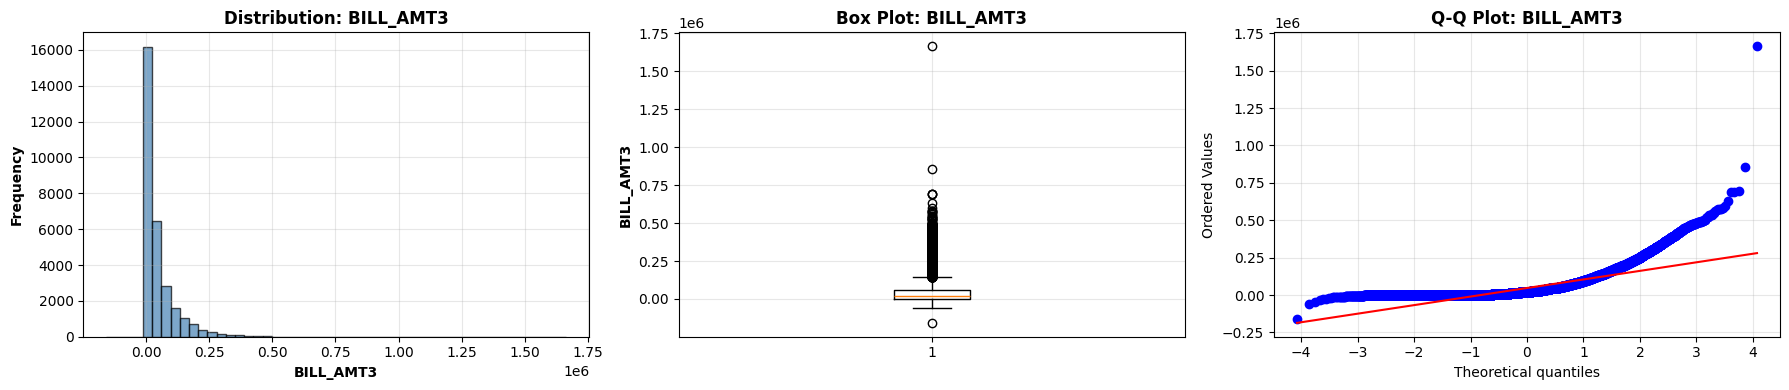


COLUMN: BILL_AMT4
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 21,548

--- Basic Statistics ---
Mean: 43262.9490
Median: 19052.0000
Std Dev: 64332.8561
Min: -170000.0000
25th Percentile: 2326.7500
75th Percentile: 54506.0000
Max: 891586.0000
Range: 1061586.0000
IQR: 52179.2500
Skewness: 2.8220
Kurtosis: 11.3093
Zero values: 3,195 (10.65%)
Negative values: 675 (2.25%)

--- Value Distribution (Top 20) ---
    Value  Count  Percentage
   0.0000   3195     10.6500
 390.0000    246      0.8200
 780.0000    101      0.3367
 316.0000     68      0.2267
 326.0000     62      0.2067
 396.0000     44      0.1467
 150.0000     39      0.1300
2400.0000     39      0.1300
2500.0000     34      0.1133
 416.0000     33      0.1100
1000.0000     33      0.1100
  -3.0000     27      0.0900
  -1.0000     25      0.0833
 -18.0000     24      0.0800
1050.0000     24      0.0800
1261.0000     24      0.0800
  -2.0000     23      0.0767
 300.0000     22      0.07

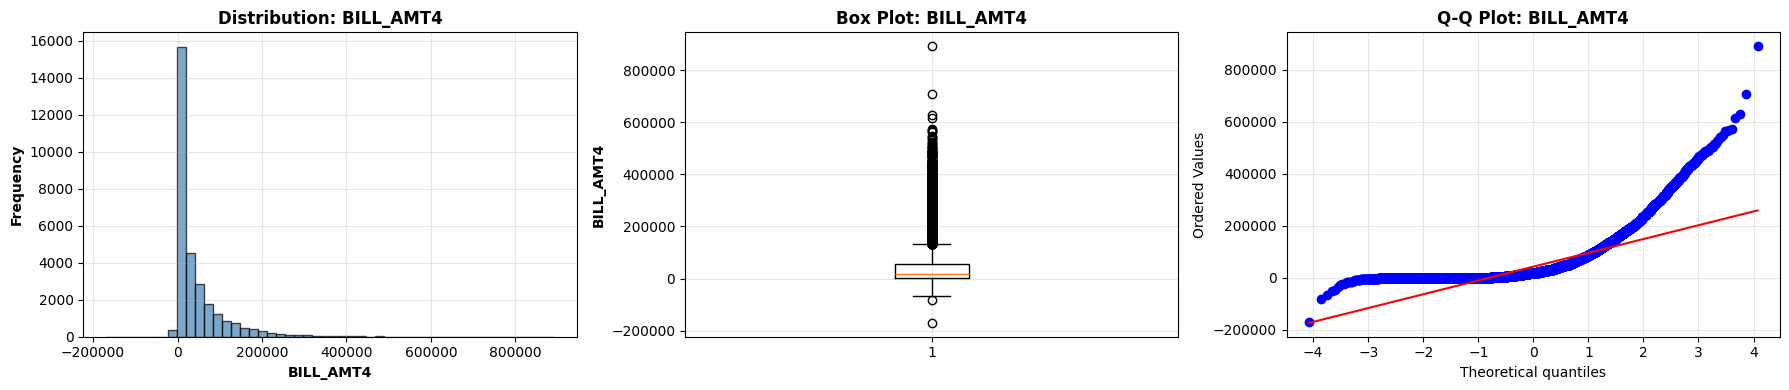


COLUMN: BILL_AMT5
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 21,010

--- Basic Statistics ---
Mean: 40311.4010
Median: 18104.5000
Std Dev: 60797.1558
Min: -81334.0000
25th Percentile: 1763.0000
75th Percentile: 50190.5000
Max: 927171.0000
Range: 1008505.0000
IQR: 48427.5000
Skewness: 2.8764
Kurtosis: 12.3059
Zero values: 3,506 (11.69%)
Negative values: 655 (2.18%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   3506     11.6867
  390.0000    235      0.7833
  780.0000     94      0.3133
  316.0000     79      0.2633
  326.0000     62      0.2067
  150.0000     58      0.1933
  396.0000     47      0.1567
 2400.0000     39      0.1300
 2500.0000     37      0.1233
  416.0000     36      0.1200
  -18.0000     32      0.1067
 1000.0000     30      0.1000
  300.0000     25      0.0833
   -1.0000     24      0.0800
 1473.0000     23      0.0767
 1050.0000     23      0.0767
10000.0000     23      0.0767
  500.000

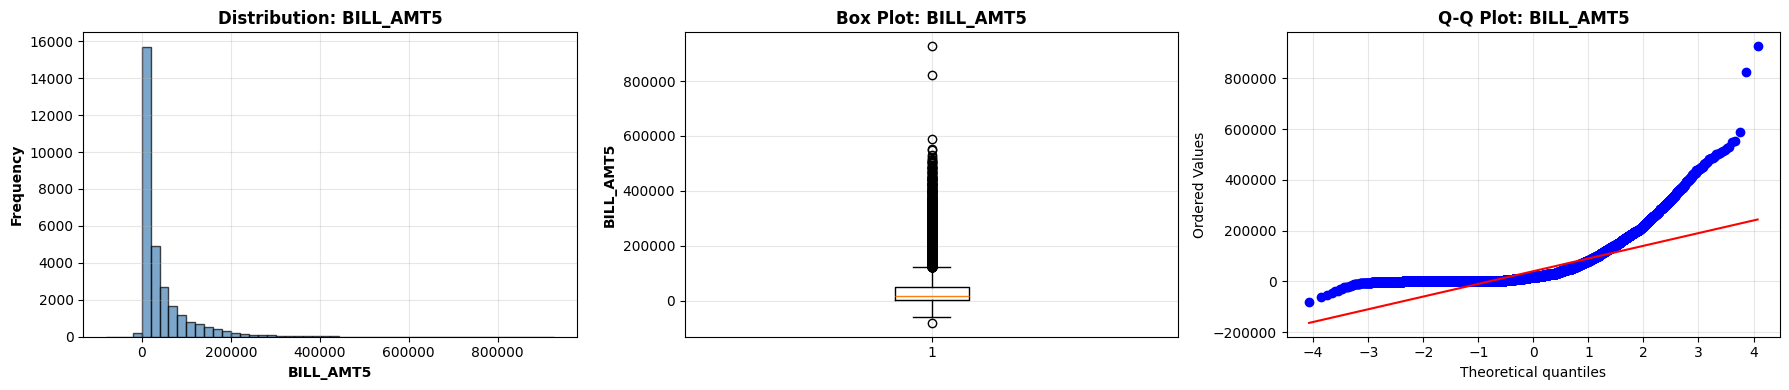


COLUMN: BILL_AMT6
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 20,604

--- Basic Statistics ---
Mean: 38871.7604
Median: 17071.0000
Std Dev: 59554.1075
Min: -339603.0000
25th Percentile: 1256.0000
75th Percentile: 49198.2500
Max: 961664.0000
Range: 1301267.0000
IQR: 47942.2500
Skewness: 2.8466
Kurtosis: 12.2707
Zero values: 4,020 (13.40%)
Negative values: 688 (2.29%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   4020     13.4000
  390.0000    207      0.6900
  780.0000     86      0.2867
  150.0000     78      0.2600
  316.0000     77      0.2567
  326.0000     56      0.1867
  396.0000     45      0.1500
  416.0000     36      0.1200
  -18.0000     33      0.1100
 2400.0000     32      0.1067
 1000.0000     31      0.1033
 2500.0000     30      0.1000
  500.0000     29      0.0967
  540.0000     29      0.0967
10000.0000     27      0.0900
  300.0000     26      0.0867
   -1.0000     25      0.0833
  930.00

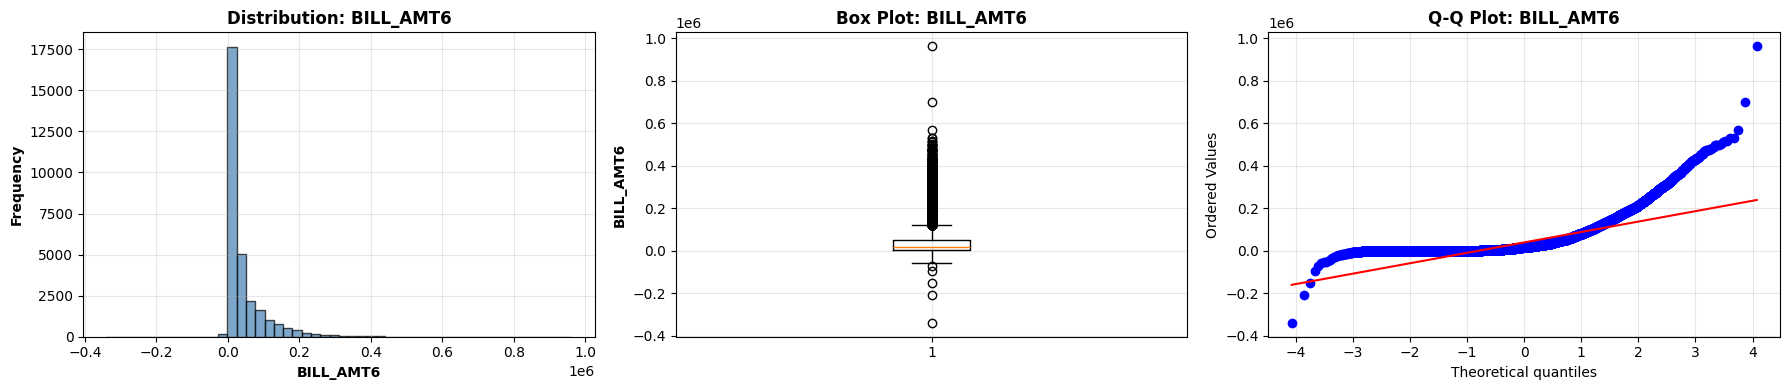


COLUMN: PAY_AMT1
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 7,943

--- Basic Statistics ---
Mean: 5663.5805
Median: 2100.0000
Std Dev: 16563.2804
Min: 0.0000
25th Percentile: 1000.0000
75th Percentile: 5006.0000
Max: 873552.0000
Range: 873552.0000
IQR: 4006.0000
Skewness: 14.6684
Kurtosis: 415.2547
Zero values: 5,249 (17.50%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   5249     17.4967
 2000.0000   1363      4.5433
 3000.0000    891      2.9700
 5000.0000    698      2.3267
 1500.0000    507      1.6900
 4000.0000    426      1.4200
10000.0000    401      1.3367
 1000.0000    365      1.2167
 2500.0000    298      0.9933
 6000.0000    294      0.9800
  390.0000    207      0.6900
 7000.0000    195      0.6500
 3500.0000    185      0.6167
 1300.0000    184      0.6133
 8000.0000    176      0.5867
 1600.0000    174      0.5800
 1800.0000    167      0.5567
 1700.0000    157    

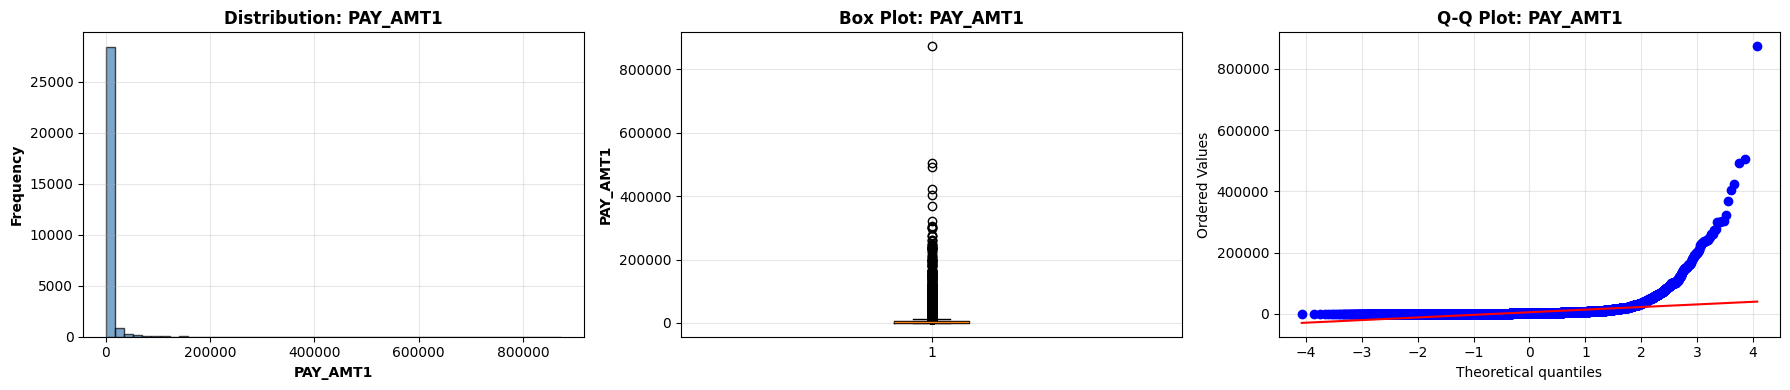


COLUMN: PAY_AMT2
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 7,899

--- Basic Statistics ---
Mean: 5921.1635
Median: 2009.0000
Std Dev: 23040.8704
Min: 0.0000
25th Percentile: 833.0000
75th Percentile: 5000.0000
Max: 1684259.0000
Range: 1684259.0000
IQR: 4167.0000
Skewness: 30.4538
Kurtosis: 1641.6319
Zero values: 5,396 (17.99%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   5396     17.9867
 2000.0000   1290      4.3000
 3000.0000    857      2.8567
 5000.0000    717      2.3900
 1000.0000    594      1.9800
 1500.0000    521      1.7367
 4000.0000    410      1.3667
10000.0000    318      1.0600
 6000.0000    283      0.9433
 2500.0000    251      0.8367
  390.0000    235      0.7833
 1200.0000    208      0.6933
 1600.0000    182      0.6067
 1300.0000    173      0.5767
 7000.0000    170      0.5667
 3500.0000    167      0.5567
 8000.0000    146      0.4867
 1400.0000    143  

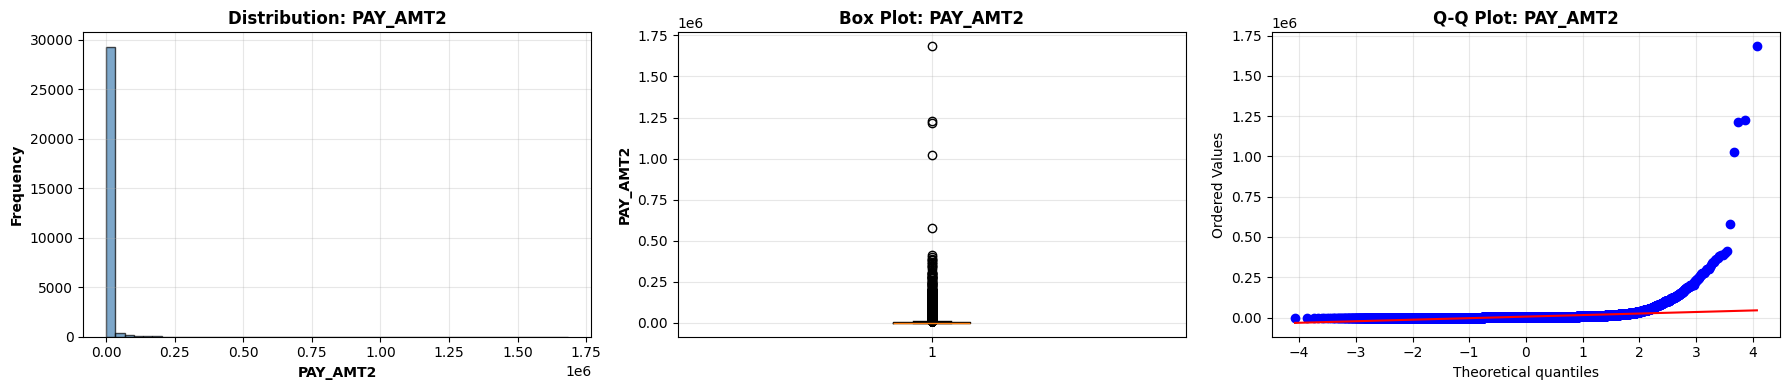


COLUMN: PAY_AMT3
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 7,518

--- Basic Statistics ---
Mean: 5225.6815
Median: 1800.0000
Std Dev: 17606.9615
Min: 0.0000
25th Percentile: 390.0000
75th Percentile: 4505.0000
Max: 896040.0000
Range: 896040.0000
IQR: 4115.0000
Skewness: 17.2166
Kurtosis: 564.3112
Zero values: 5,968 (19.89%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   5968     19.8933
 2000.0000   1285      4.2833
 1000.0000   1103      3.6767
 3000.0000    870      2.9000
 5000.0000    721      2.4033
 1500.0000    490      1.6333
 4000.0000    381      1.2700
10000.0000    312      1.0400
 1200.0000    243      0.8100
 6000.0000    241      0.8033
 2500.0000    228      0.7600
  390.0000    207      0.6900
 1300.0000    164      0.5467
  500.0000    157      0.5233
 7000.0000    154      0.5133
 8000.0000    143      0.4767
 3500.0000    142      0.4733
 1600.0000    135     

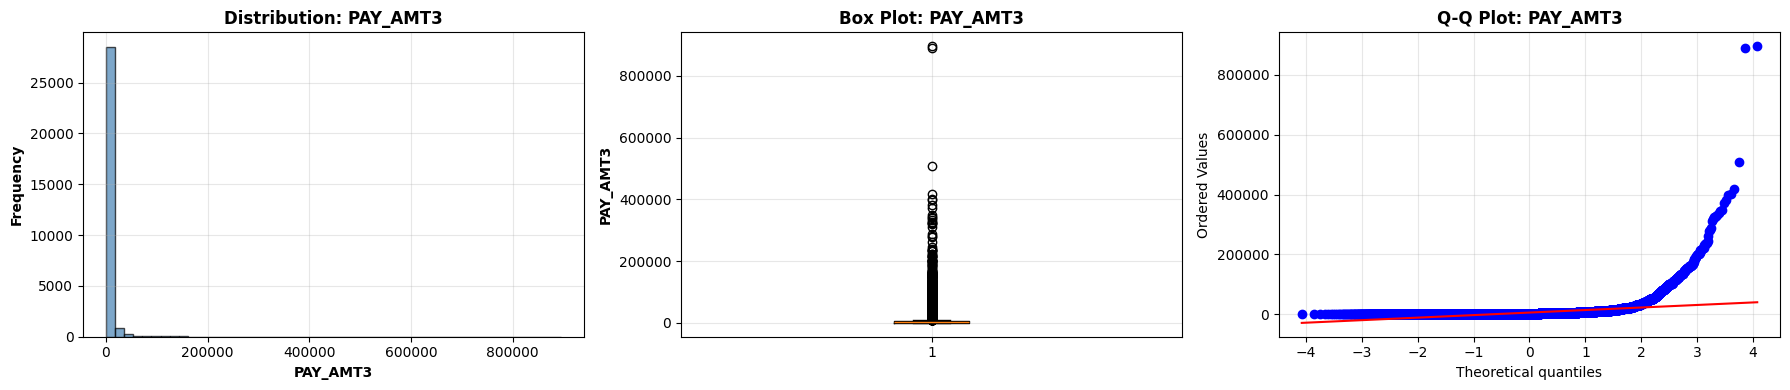


COLUMN: PAY_AMT4
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 6,937

--- Basic Statistics ---
Mean: 4826.0769
Median: 1500.0000
Std Dev: 15666.1597
Min: 0.0000
25th Percentile: 296.0000
75th Percentile: 4013.2500
Max: 621000.0000
Range: 621000.0000
IQR: 3717.2500
Skewness: 12.9050
Kurtosis: 277.3338
Zero values: 6,408 (21.36%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   6408     21.3600
 1000.0000   1394      4.6467
 2000.0000   1214      4.0467
 3000.0000    887      2.9567
 5000.0000    810      2.7000
 1500.0000    441      1.4700
 4000.0000    402      1.3400
10000.0000    341      1.1367
 2500.0000    259      0.8633
  500.0000    258      0.8600
 6000.0000    255      0.8500
  390.0000    208      0.6933
 1200.0000    175      0.5833
 3500.0000    169      0.5633
 7000.0000    163      0.5433
  700.0000    141      0.4700
 1100.0000    141      0.4700
  600.0000    122     

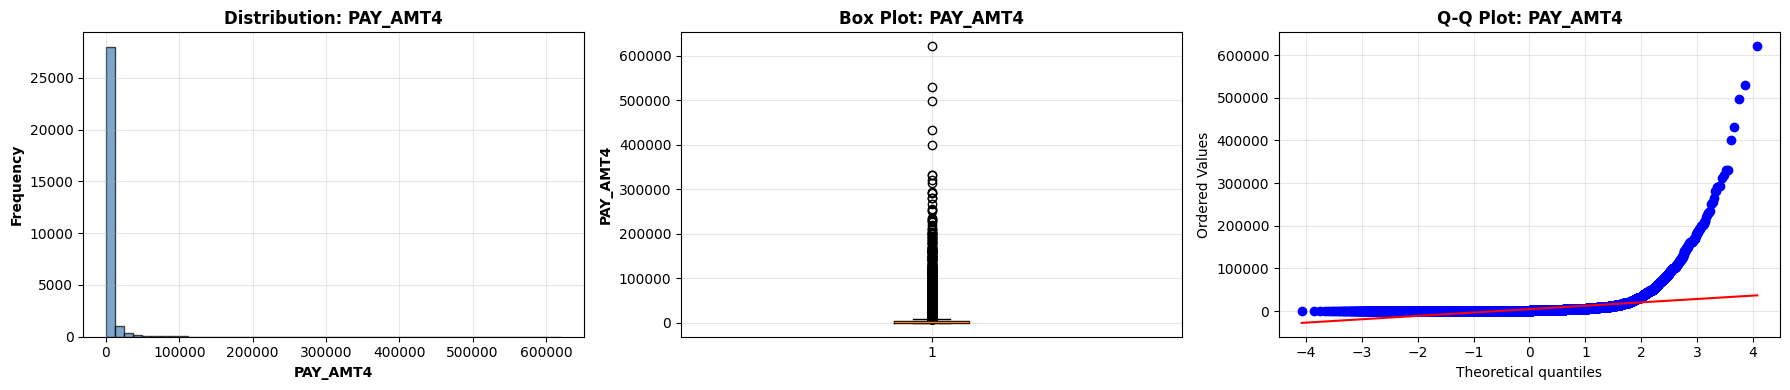


COLUMN: PAY_AMT5
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 6,897

--- Basic Statistics ---
Mean: 4799.3876
Median: 1500.0000
Std Dev: 15278.3057
Min: 0.0000
25th Percentile: 252.5000
75th Percentile: 4031.5000
Max: 426529.0000
Range: 426529.0000
IQR: 3779.0000
Skewness: 11.1274
Kurtosis: 180.0639
Zero values: 6,703 (22.34%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   6703     22.3433
 1000.0000   1340      4.4667
 2000.0000   1323      4.4100
 3000.0000    947      3.1567
 5000.0000    814      2.7133
 1500.0000    426      1.4200
 4000.0000    401      1.3367
10000.0000    343      1.1433
  500.0000    250      0.8333
 6000.0000    247      0.8233
 2500.0000    233      0.7767
  390.0000    179      0.5967
 1200.0000    162      0.5400
 7000.0000    159      0.5300
 3500.0000    158      0.5267
 1100.0000    125      0.4167
 8000.0000    118      0.3933
  700.0000    116     

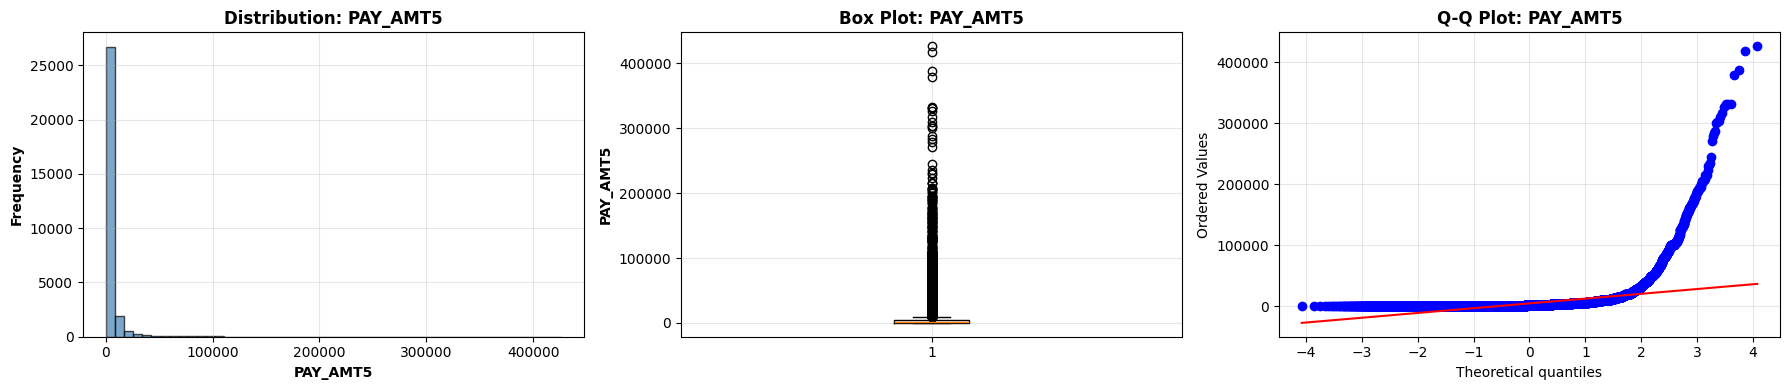


COLUMN: PAY_AMT6
Data Type: float64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 6,939

--- Basic Statistics ---
Mean: 5215.5026
Median: 1500.0000
Std Dev: 17777.4658
Min: 0.0000
25th Percentile: 117.7500
75th Percentile: 4000.0000
Max: 528666.0000
Range: 528666.0000
IQR: 3882.2500
Skewness: 10.6407
Kurtosis: 167.1614
Zero values: 7,173 (23.91%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
     Value  Count  Percentage
    0.0000   7173     23.9100
 1000.0000   1299      4.3300
 2000.0000   1295      4.3167
 3000.0000    914      3.0467
 5000.0000    808      2.6933
 1500.0000    439      1.4633
 4000.0000    411      1.3700
10000.0000    356      1.1867
  500.0000    247      0.8233
 6000.0000    220      0.7333
 2500.0000    214      0.7133
  390.0000    177      0.5900
 3500.0000    159      0.5300
 7000.0000    149      0.4967
 1200.0000    148      0.4933
 8000.0000    115      0.3833
  600.0000    112      0.3733
 1100.0000    109     

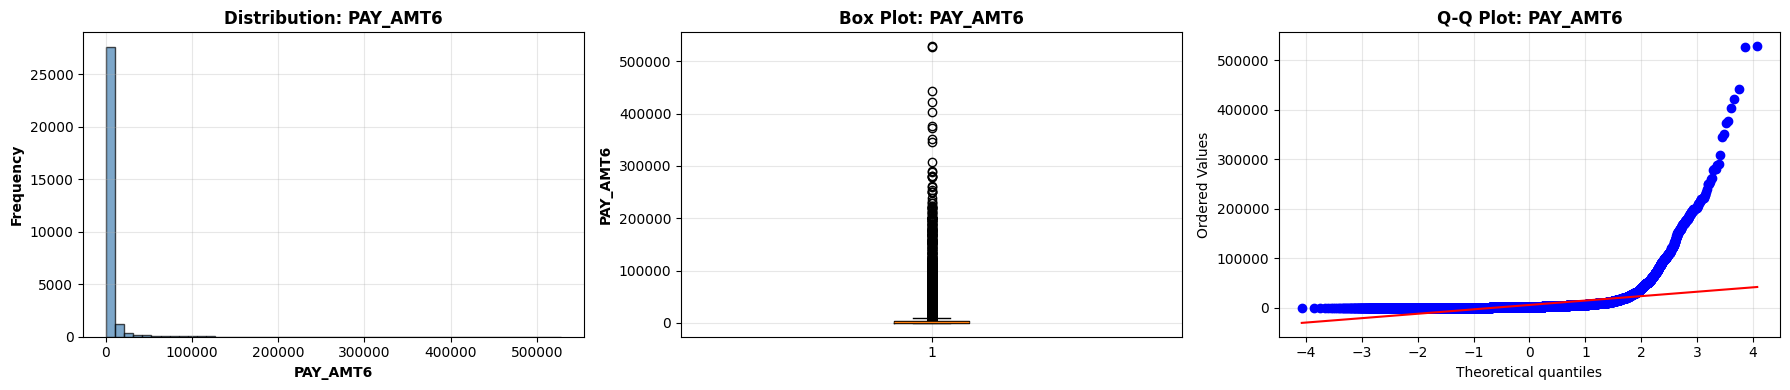


COLUMN: default.payment.next.month
Data Type: int64
Non-Null Count: 30,000 (100.00%)
Null Count: 0 (0.00%)
Unique Values: 2

--- Basic Statistics ---
Mean: 0.2212
Median: 0.0000
Std Dev: 0.4151
Min: 0.0000
25th Percentile: 0.0000
75th Percentile: 0.0000
Max: 1.0000
Range: 1.0000
IQR: 0.0000
Skewness: 1.3435
Kurtosis: -0.1950
Zero values: 23,364 (77.88%)
Negative values: 0 (0.00%)

--- Value Distribution (Top 20) ---
 Value  Count  Percentage
     0  23364     77.8800
     1   6636     22.1200


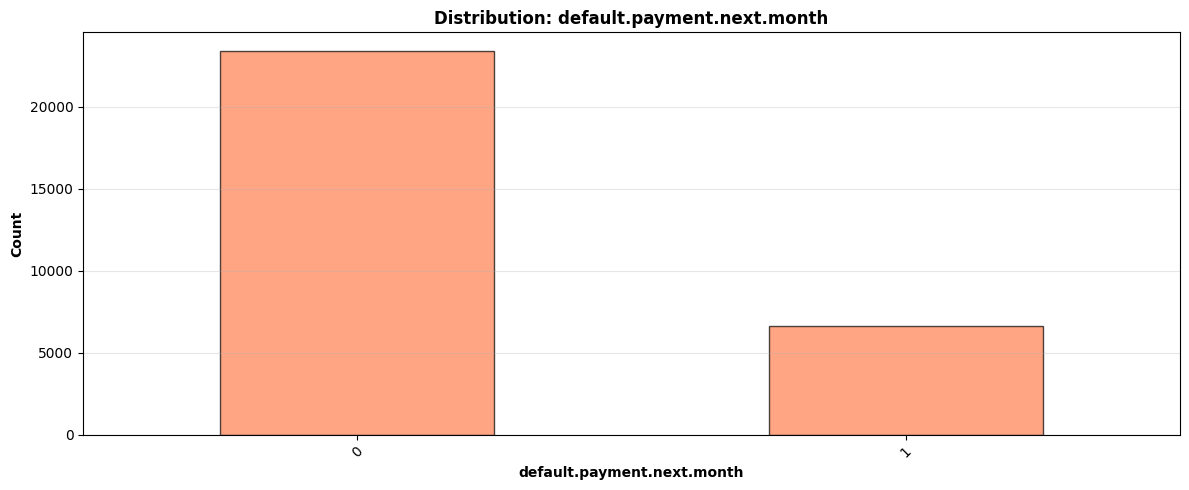

In [ ]:

print("\n" + "="*80)
print("SECTION 2: DATA TYPES & MEMORY USAGE")
print("="*80)

dtype_summary = pd.DataFrame({
    'Column': uci.columns,
    'Data_Type': uci.dtypes.values,
    'Non_Null_Count': uci.count().values,
    'Null_Count': uci.isnull().sum().values,
    'Null_Percentage': (uci.isnull().sum() / len(uci) * 100).round(2).values,
    'Unique_Values': uci.nunique().values,
    'Memory_KB': (uci.memory_usage(deep=True) / 1024).round(2).values[1:]  # Skip index
})

print(dtype_summary.to_string(index=False))

print(f"\n--- Memory Summary ---")
print(f"Total Memory: {uci.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Average per row: {uci.memory_usage(deep=True).sum() / len(uci):.2f} bytes")


# ============================================
# 5. MISSING VALUES ANALYSIS
# ============================================

print("\n" + "="*80)
print("SECTION 3: MISSING VALUES ANALYSIS")
print("="*80)

missing_summary = pd.DataFrame({
    'Column': uci.columns,
    'Missing_Count': uci.isnull().sum().values,
    'Missing_Percentage': (uci.isnull().sum() / len(uci) * 100).round(2).values,
    'Missing_Type': ['None' if uci[col].isnull().sum() == 0 else 'Present' for col in uci.columns]
})

print(missing_summary.to_string(index=False))

if uci.isnull().sum().sum() == 0:
    print("\n✓ EXCELLENT: No missing values in the dataset!")
else:
    print(f"\n⚠ Total missing values: {uci.isnull().sum().sum()}")


# ============================================
# 6. DUPLICATE ANALYSIS
# ============================================

print("\n" + "="*80)
print("SECTION 4: DUPLICATE ANALYSIS")
print("="*80)

print(f"--- ID Column Duplicates ---")
id_dup_count = uci['ID'].duplicated().sum()
print(f"Duplicate IDs: {id_dup_count}")

if id_dup_count > 0:
    print(f"\nDuplicate ID examples:")
    dup_ids = uci[uci['ID'].duplicated(keep=False)].sort_values('ID')
    print(dup_ids.head(20))

print(f"\n--- Full Row Duplicates ---")
full_dup_count = uci.duplicated().sum()
print(f"Fully duplicate rows: {full_dup_count}")

if full_dup_count > 0:
    print(uci[uci.duplicated(keep=False)].head(20))


# ============================================
# 7. COLUMN-BY-COLUMN DEEP DIVE
# ============================================

print("\n" + "="*80)
print("SECTION 5: COLUMN-BY-COLUMN ANALYSIS")
print("="*80)

# Helper function for detailed column analysis
def analyze_column(df, col):
    print(f"\n{'='*80}")
    print(f"COLUMN: {col}")
    print(f"{'='*80}")

    print(f"Data Type: {df[col].dtype}")
    print(f"Non-Null Count: {df[col].count():,} ({df[col].count()/len(df)*100:.2f}%)")
    print(f"Null Count: {df[col].isnull().sum():,} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"Unique Values: {df[col].nunique():,}")

    print(f"\n--- Basic Statistics ---")
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"Mean: {df[col].mean():.4f}")
        print(f"Median: {df[col].median():.4f}")
        print(f"Std Dev: {df[col].std():.4f}")
        print(f"Min: {df[col].min():.4f}")
        print(f"25th Percentile: {df[col].quantile(0.25):.4f}")
        print(f"75th Percentile: {df[col].quantile(0.75):.4f}")
        print(f"Max: {df[col].max():.4f}")
        print(f"Range: {df[col].max() - df[col].min():.4f}")
        print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.4f}")

        # Skewness and Kurtosis
        print(f"Skewness: {df[col].skew():.4f}")
        print(f"Kurtosis: {df[col].kurtosis():.4f}")

        # Zeros and negatives
        zero_count = (df[col] == 0).sum()
        neg_count = (df[col] < 0).sum()
        print(f"Zero values: {zero_count:,} ({zero_count/len(df)*100:.2f}%)")
        print(f"Negative values: {neg_count:,} ({neg_count/len(df)*100:.2f}%)")

    print(f"\n--- Value Distribution (Top 20) ---")
    value_counts = df[col].value_counts().head(20)
    value_pct = df[col].value_counts(normalize=True).head(20) * 100

    dist_df = pd.DataFrame({
        'Value': value_counts.index,
        'Count': value_counts.values,
        'Percentage': value_pct.values
    })
    print(dist_df.to_string(index=False))

    # Visualization for numeric columns
    if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 10:
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))

        # Histogram
        axes[0].hist(df[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0].set_xlabel(col, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontweight='bold')
        axes[0].set_title(f'Distribution: {col}', fontweight='bold')
        axes[0].grid(alpha=0.3)

        # Box plot
        axes[1].boxplot(df[col].dropna(), vert=True)
        axes[1].set_ylabel(col, fontweight='bold')
        axes[1].set_title(f'Box Plot: {col}', fontweight='bold')
        axes[1].grid(alpha=0.3)

        # Q-Q plot
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[2])
        axes[2].set_title(f'Q-Q Plot: {col}', fontweight='bold')
        axes[2].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

    # Bar chart for categorical
    elif df[col].nunique() <= 20:
        plt.figure(figsize=(12, 5))
        value_counts.plot(kind='bar', color='coral', edgecolor='black', alpha=0.7)
        plt.xlabel(col, fontweight='bold')
        plt.ylabel('Count', fontweight='bold')
        plt.title(f'Distribution: {col}', fontweight='bold')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Analyze each column
for col in uci.columns:
    analyze_column(uci, col)


SECTION 6: TARGET VARIABLE ANALYSIS

--- Target: default.payment.next.month ---

Class Distribution:
  0 (No Default): 23,364 (77.88%)
  1 (Default): 6,636 (22.12%)

Class Imbalance Ratio: 3.52:1
Minority Class: 6636 samples
Majority Class: 23364 samples


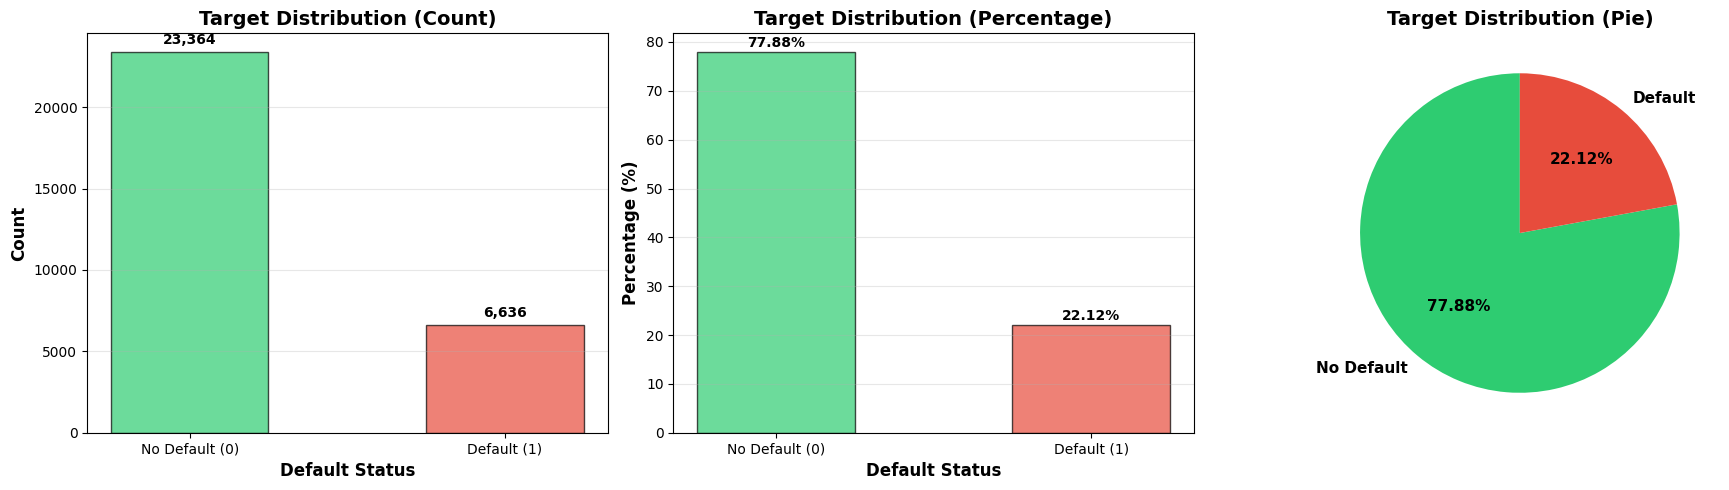

In [ ]:

# ============================================
# 8. TARGET VARIABLE DEEP DIVE
# ============================================

print("\n" + "="*80)
print("SECTION 6: TARGET VARIABLE ANALYSIS")
print("="*80)

target_col = 'default.payment.next.month'

print(f"\n--- Target: {target_col} ---")
target_dist = uci[target_col].value_counts().sort_index()
target_pct = uci[target_col].value_counts(normalize=True).sort_index() * 100

print(f"\nClass Distribution:")
for val, count, pct in zip(target_dist.index, target_dist.values, target_pct.values):
    class_name = "No Default" if val == 0 else "Default"
    print(f"  {val} ({class_name}): {count:,} ({pct:.2f}%)")

print(f"\nClass Imbalance Ratio: {target_dist[0] / target_dist[1]:.2f}:1")
print(f"Minority Class: {target_dist.min()} samples")
print(f"Majority Class: {target_dist.max()} samples")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
axes[0].bar([0, 1], target_dist.values, color=['#2ecc71', '#e74c3c'],
           alpha=0.7, edgecolor='black', width=0.5)
axes[0].set_xlabel('Default Status', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Target Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Default (0)', 'Default (1)'])
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(target_dist.values):
    axes[0].text(i, v + 500, f"{v:,}", ha='center', fontweight='bold')

# Percentage plot
axes[1].bar([0, 1], target_pct.values, color=['#2ecc71', '#e74c3c'],
           alpha=0.7, edgecolor='black', width=0.5)
axes[1].set_xlabel('Default Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Target Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(target_pct.values):
    axes[1].text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

# Pie chart
axes[2].pie(target_dist.values, labels=['No Default', 'Default'],
           autopct='%1.2f%%', colors=['#2ecc71', '#e74c3c'],
           startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[2].set_title('Target Distribution (Pie)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('target_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ============================================
# 9. NUMERIC FEATURES OVERVIEW
# ============================================

print("\n" + "="*80)
print("SECTION 7: NUMERIC FEATURES STATISTICAL SUMMARY")
print("="*80)

numeric_cols = uci.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {len(numeric_cols)}")
print(numeric_cols)

print("\n--- Complete Statistical Summary ---")
print(uci[numeric_cols].describe().T)

print("\n--- Additional Statistics ---")
additional_stats = pd.DataFrame({
    'Column': numeric_cols,
    'Skewness': [uci[col].skew() for col in numeric_cols],
    'Kurtosis': [uci[col].kurtosis() for col in numeric_cols],
    'Zeros_%': [(uci[col] == 0).sum() / len(uci) * 100 for col in numeric_cols],
    'Negatives_%': [(uci[col] < 0).sum() / len(uci) * 100 for col in numeric_cols],
})
print(additional_stats.to_string(index=False))


SECTION 7: NUMERIC FEATURES STATISTICAL SUMMARY

Numeric columns: 25
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']

--- Complete Statistical Summary ---
                                count        mean         std          min  \
ID                         30000.0000  15000.5000   8660.3984       1.0000   
LIMIT_BAL                  30000.0000 167484.3227 129747.6616   10000.0000   
SEX                        30000.0000      1.6037      0.4891       1.0000   
EDUCATION                  30000.0000      1.8531      0.7903       0.0000   
MARRIAGE                   30000.0000      1.5519      0.5220       0.0000   
AGE                        30000.0000     35.4855      9.2179      21.0000   
PAY_0                      30000.0000     -0.0167    

In [ ]:
# ============================================
# 10. CATEGORICAL FEATURES OVERVIEW
# ============================================

print("\n" + "="*80)
print("SECTION 8: CATEGORICAL FEATURES SUMMARY")
print("="*80)

categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_cols:
    if col in uci.columns:
        print(f"\n--- {col} ---")
        value_dist = uci[col].value_counts().sort_index()
        value_pct = uci[col].value_counts(normalize=True).sort_index() * 100

        cat_df = pd.DataFrame({
            'Value': value_dist.index,
            'Count': value_dist.values,
            'Percentage': value_pct.values
        })
        print(cat_df.to_string(index=False))



SECTION 8: CATEGORICAL FEATURES SUMMARY

--- SEX ---
 Value  Count  Percentage
     1  11888     39.6267
     2  18112     60.3733

--- EDUCATION ---
 Value  Count  Percentage
     0     14      0.0467
     1  10585     35.2833
     2  14030     46.7667
     3   4917     16.3900
     4    123      0.4100
     5    280      0.9333
     6     51      0.1700

--- MARRIAGE ---
 Value  Count  Percentage
     0     54      0.1800
     1  13659     45.5300
     2  15964     53.2133
     3    323      1.0767



SECTION 9: PAYMENT STATUS DEEP DIVE

Payment status columns (12): ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

--- Payment Status Code Meanings ---

-2: No consumption (didn't use card that month)
-1: Paid in full (no balance carried)
 0: Use of revolving credit (paid minimum, carrying balance)
 1: Payment delay for 1 month
 2: Payment delay for 2 months
 3-8: Payment delay for 3-8 months


--- Payment Status Summary ---
  Column      Mean    Median   Mode        Std     Min          Max  Delayed_%  Zero_%  Paid_Full_%
   PAY_0   -0.0167    0.0000 0.0000     1.1238 -2.0000       8.0000    22.7267 49.1233      18.9533
   PAY_2   -0.1338    0.0000 0.0000     1.1972 -2.0000       8.0000    14.7933 52.4333      20.1667
   PAY_3   -0.1662    0.0000 0.0000     1.1969 -2.0000       8.0000    14.0433 52.5467      19.7933
   PAY_4   -0.2207    0.0000 0.0000     1.1691 -2.0000       8.0000    11.7000 54.8500     

IndexError: index 9 is out of bounds for axis 0 with size 9

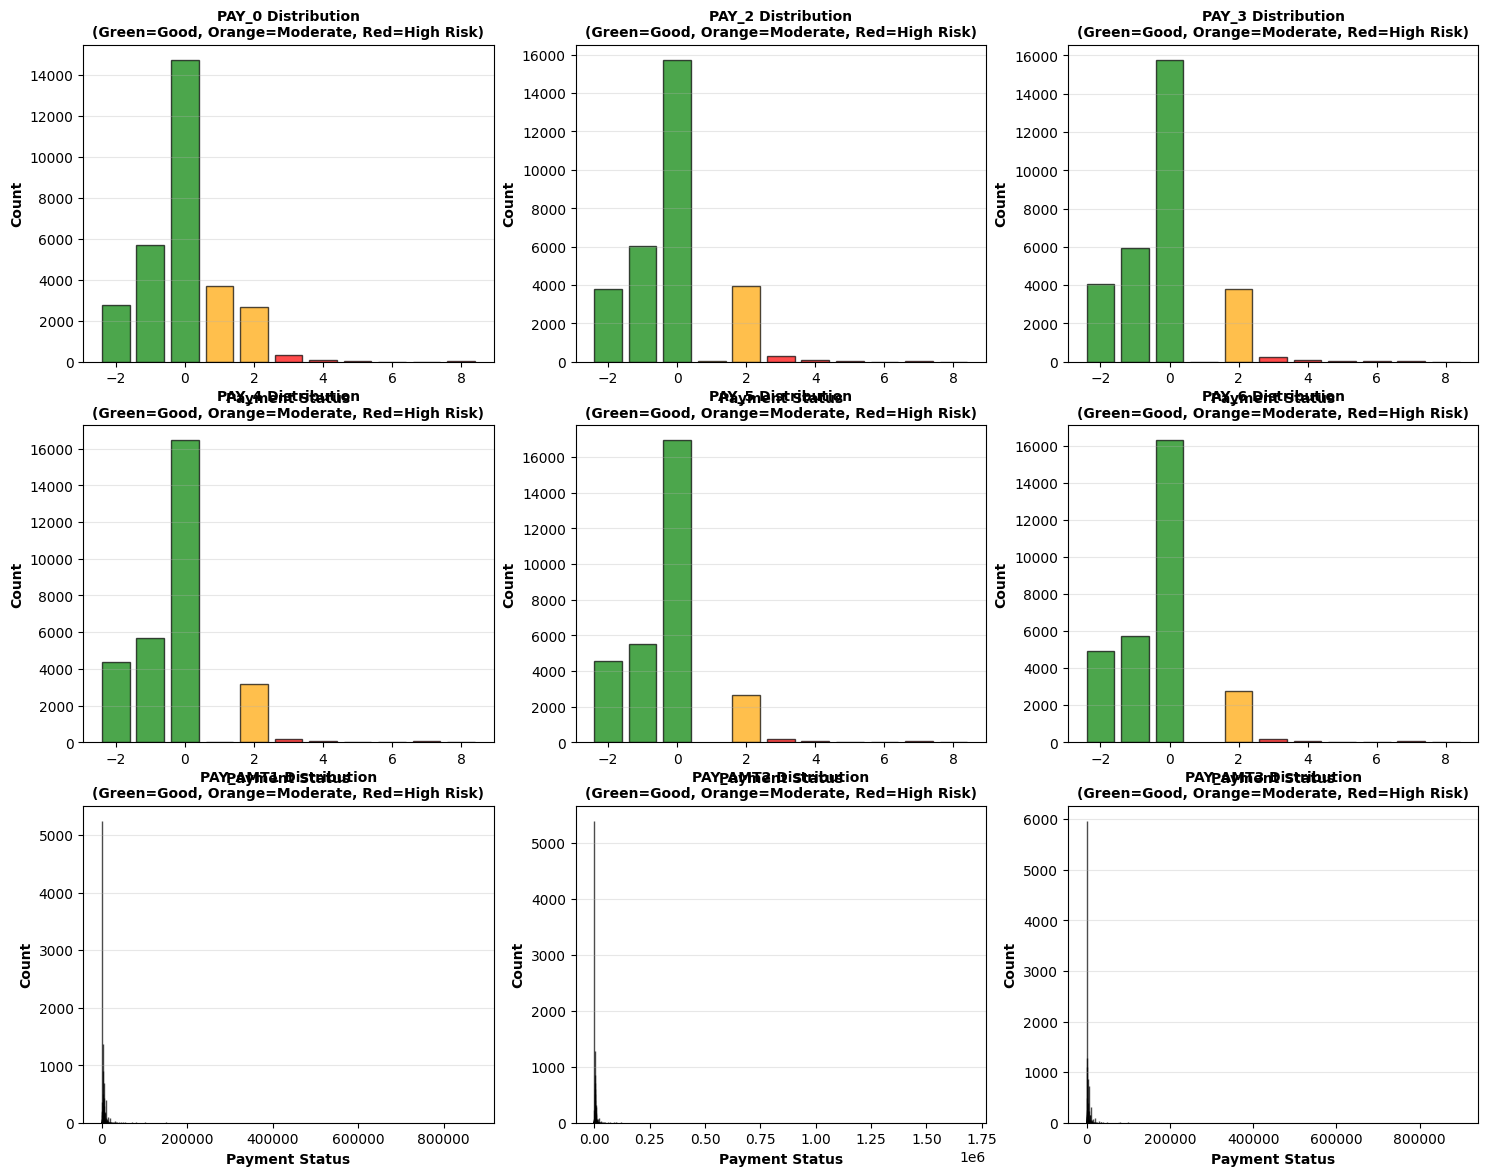

In [ ]:
# ============================================
# SECTION 9 (FIXED): PAYMENT STATUS ANALYSIS
# ============================================

print("\n" + "="*80)
print("SECTION 9: PAYMENT STATUS DEEP DIVE")
print("="*80)

pay_cols = [col for col in uci.columns if col.startswith('PAY_')]
print(f"\nPayment status columns ({len(pay_cols)}): {pay_cols}")

print("\n--- Payment Status Code Meanings ---")
print("""
-2: No consumption (didn't use card that month)
-1: Paid in full (no balance carried)
 0: Use of revolving credit (paid minimum, carrying balance)
 1: Payment delay for 1 month
 2: Payment delay for 2 months
 3-8: Payment delay for 3-8 months
""")

# Summary statistics
print("\n--- Payment Status Summary ---")
pay_summary = pd.DataFrame({
    'Column': pay_cols,
    'Mean': [uci[col].mean() for col in pay_cols],
    'Median': [uci[col].median() for col in pay_cols],
    'Mode': [uci[col].mode()[0] for col in pay_cols],
    'Std': [uci[col].std() for col in pay_cols],
    'Min': [uci[col].min() for col in pay_cols],
    'Max': [uci[col].max() for col in pay_cols],
    'Delayed_%': [(uci[col] > 0).sum() / len(uci) * 100 for col in pay_cols],
    'Zero_%': [(uci[col] == 0).sum() / len(uci) * 100 for col in pay_cols],
    'Paid_Full_%': [(uci[col] == -1).sum() / len(uci) * 100 for col in pay_cols],
})
print(pay_summary.to_string(index=False))

# Visualization - FIXED: 3 rows x 3 columns for 7 payment cols
fig, axes = plt.subplots(3, 3, figsize=(18, 14))  # Changed to 3x3
axes = axes.flatten()  # Flatten to make indexing easier

for idx, col in enumerate(pay_cols):
    ax = axes[idx]

    value_counts = uci[col].value_counts().sort_index()
    colors = ['green' if v <= 0 else 'orange' if v <= 2 else 'red'
              for v in value_counts.index]

    ax.bar(value_counts.index, value_counts.values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Payment Status', fontweight='bold', fontsize=10)
    ax.set_ylabel('Count', fontweight='bold', fontsize=10)
    ax.set_title(f'{col} Distribution\n(Green=Good, Orange=Moderate, Red=High Risk)',
                fontsize=10, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

# Hide unused subplots
for idx in range(len(pay_cols), 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('payment_status_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Payment status analysis complete")

In [ ]:
# ============================================
# 12. BILL AMOUNTS (BILL_AMT1 to BILL_AMT6)
# ============================================

print("\n" + "="*80)
print("SECTION 10: BILL AMOUNTS ANALYSIS")
print("="*80)

bill_cols = [col for col in uci.columns if col.startswith('BILL_AMT')]
print(f"\nBill amount columns: {bill_cols}")

print("\n--- Bill Amounts Summary Statistics ---")
print(uci[bill_cols].describe().T)

print("\n--- Negative Bill Amounts (Credits/Refunds) ---")
for col in bill_cols:
    neg_count = (uci[col] < 0).sum()
    neg_pct = neg_count / len(uci) * 100
    print(f"{col}: {neg_count:,} negative values ({neg_pct:.2f}%)")
    if neg_count > 0:
        print(f"  Min: {uci[col].min():,.2f}")
        print(f"  Negative mean: {uci[uci[col] < 0][col].mean():,.2f}")


SECTION 10: BILL AMOUNTS ANALYSIS

Bill amount columns: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

--- Bill Amounts Summary Statistics ---
               count       mean        std          min       25%        50%  \
BILL_AMT1 30000.0000 51223.3309 73635.8606 -165580.0000 3558.7500 22381.5000   
BILL_AMT2 30000.0000 49179.0752 71173.7688  -69777.0000 2984.7500 21200.0000   
BILL_AMT3 30000.0000 47013.1548 69349.3874 -157264.0000 2666.2500 20088.5000   
BILL_AMT4 30000.0000 43262.9490 64332.8561 -170000.0000 2326.7500 19052.0000   
BILL_AMT5 30000.0000 40311.4010 60797.1558  -81334.0000 1763.0000 18104.5000   
BILL_AMT6 30000.0000 38871.7604 59554.1075 -339603.0000 1256.0000 17071.0000   

                 75%          max  
BILL_AMT1 67091.0000  964511.0000  
BILL_AMT2 64006.2500  983931.0000  
BILL_AMT3 60164.7500 1664089.0000  
BILL_AMT4 54506.0000  891586.0000  
BILL_AMT5 50190.5000  927171.0000  
BILL_AMT6 49198.2500  961664.0000  

--- Negat

In [ ]:
# ============================================
# 13. PAYMENT AMOUNTS (PAY_AMT1 to PAY_AMT6)
# ============================================

print("\n" + "="*80)
print("SECTION 11: PAYMENT AMOUNTS ANALYSIS")
print("="*80)

pay_amt_cols = [col for col in uci.columns if col.startswith('PAY_AMT')]
print(f"\nPayment amount columns: {pay_amt_cols}")

print("\n--- Payment Amounts Summary Statistics ---")
print(uci[pay_amt_cols].describe().T)

print("\n--- Zero Payments ---")
for col in pay_amt_cols:
    zero_count = (uci[col] == 0).sum()
    zero_pct = zero_count / len(uci) * 100
    print(f"{col}: {zero_count:,} zero payments ({zero_pct:.2f}%)")



SECTION 11: PAYMENT AMOUNTS ANALYSIS

Payment amount columns: ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

--- Payment Amounts Summary Statistics ---
              count      mean        std    min       25%       50%       75%  \
PAY_AMT1 30000.0000 5663.5805 16563.2804 0.0000 1000.0000 2100.0000 5006.0000   
PAY_AMT2 30000.0000 5921.1635 23040.8704 0.0000  833.0000 2009.0000 5000.0000   
PAY_AMT3 30000.0000 5225.6815 17606.9615 0.0000  390.0000 1800.0000 4505.0000   
PAY_AMT4 30000.0000 4826.0769 15666.1597 0.0000  296.0000 1500.0000 4013.2500   
PAY_AMT5 30000.0000 4799.3876 15278.3057 0.0000  252.5000 1500.0000 4031.5000   
PAY_AMT6 30000.0000 5215.5026 17777.4658 0.0000  117.7500 1500.0000 4000.0000   

                  max  
PAY_AMT1  873552.0000  
PAY_AMT2 1684259.0000  
PAY_AMT3  896040.0000  
PAY_AMT4  621000.0000  
PAY_AMT5  426529.0000  
PAY_AMT6  528666.0000  

--- Zero Payments ---
PAY_AMT1: 5,249 zero payments (17.50%)
PAY_AMT2: 5,396 zero p

In [ ]:
# ============================================
# 14. OUTLIER DETECTION
# ============================================

print("\n" + "="*80)
print("SECTION 12: OUTLIER DETECTION")
print("="*80)

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\n--- IQR Method Outliers (1.5 * IQR rule) ---")
outlier_summary = []

for col in numeric_cols:
    if col != 'ID':
        outlier_count, lower, upper = detect_outliers_iqr(uci, col)
        outlier_pct = outlier_count / len(uci) * 100
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_%': outlier_pct,
            'Lower_Bound': lower,
            'Upper_Bound': upper
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))


SECTION 12: OUTLIER DETECTION

--- IQR Method Outliers (1.5 * IQR rule) ---
                    Column  Outlier_Count  Outlier_%  Lower_Bound  Upper_Bound
                 LIMIT_BAL            167     0.5567 -235000.0000  525000.0000
                       SEX              0     0.0000      -0.5000       3.5000
                 EDUCATION            454     1.5133      -0.5000       3.5000
                  MARRIAGE              0     0.0000      -0.5000       3.5000
                       AGE            272     0.9067       8.5000      60.5000
                     PAY_0           3130    10.4333      -2.5000       1.5000
                     PAY_2           4410    14.7000      -2.5000       1.5000
                     PAY_3           4209    14.0300      -2.5000       1.5000
                     PAY_4           3508    11.6933      -2.5000       1.5000
                     PAY_5           2968     9.8933      -2.5000       1.5000
                     PAY_6           3079    10.2633  


SECTION 13: CORRELATION ANALYSIS

--- Top 20 Positive Correlations ---
Feature_1 Feature_2  Correlation
BILL_AMT1 BILL_AMT2       0.9515
BILL_AMT5 BILL_AMT6       0.9462
BILL_AMT4 BILL_AMT5       0.9401
BILL_AMT2 BILL_AMT3       0.9283
BILL_AMT3 BILL_AMT4       0.9240
BILL_AMT4 BILL_AMT6       0.9009
BILL_AMT2 BILL_AMT4       0.8925
BILL_AMT1 BILL_AMT3       0.8923
BILL_AMT3 BILL_AMT5       0.8839
BILL_AMT1 BILL_AMT4       0.8603
BILL_AMT2 BILL_AMT5       0.8598
BILL_AMT3 BILL_AMT6       0.8533
BILL_AMT2 BILL_AMT6       0.8316
BILL_AMT1 BILL_AMT5       0.8298
    PAY_4     PAY_5       0.8198
    PAY_5     PAY_6       0.8169
BILL_AMT1 BILL_AMT6       0.8027
    PAY_3     PAY_4       0.7774
    PAY_2     PAY_3       0.7666
    PAY_4     PAY_6       0.7164

--- Top 20 Negative Correlations ---
Feature_1                  Feature_2  Correlation
    PAY_3                   PAY_AMT2      -0.0668
    PAY_4                   PAY_AMT3      -0.0692
    PAY_0                   PAY_AMT2      -0.07

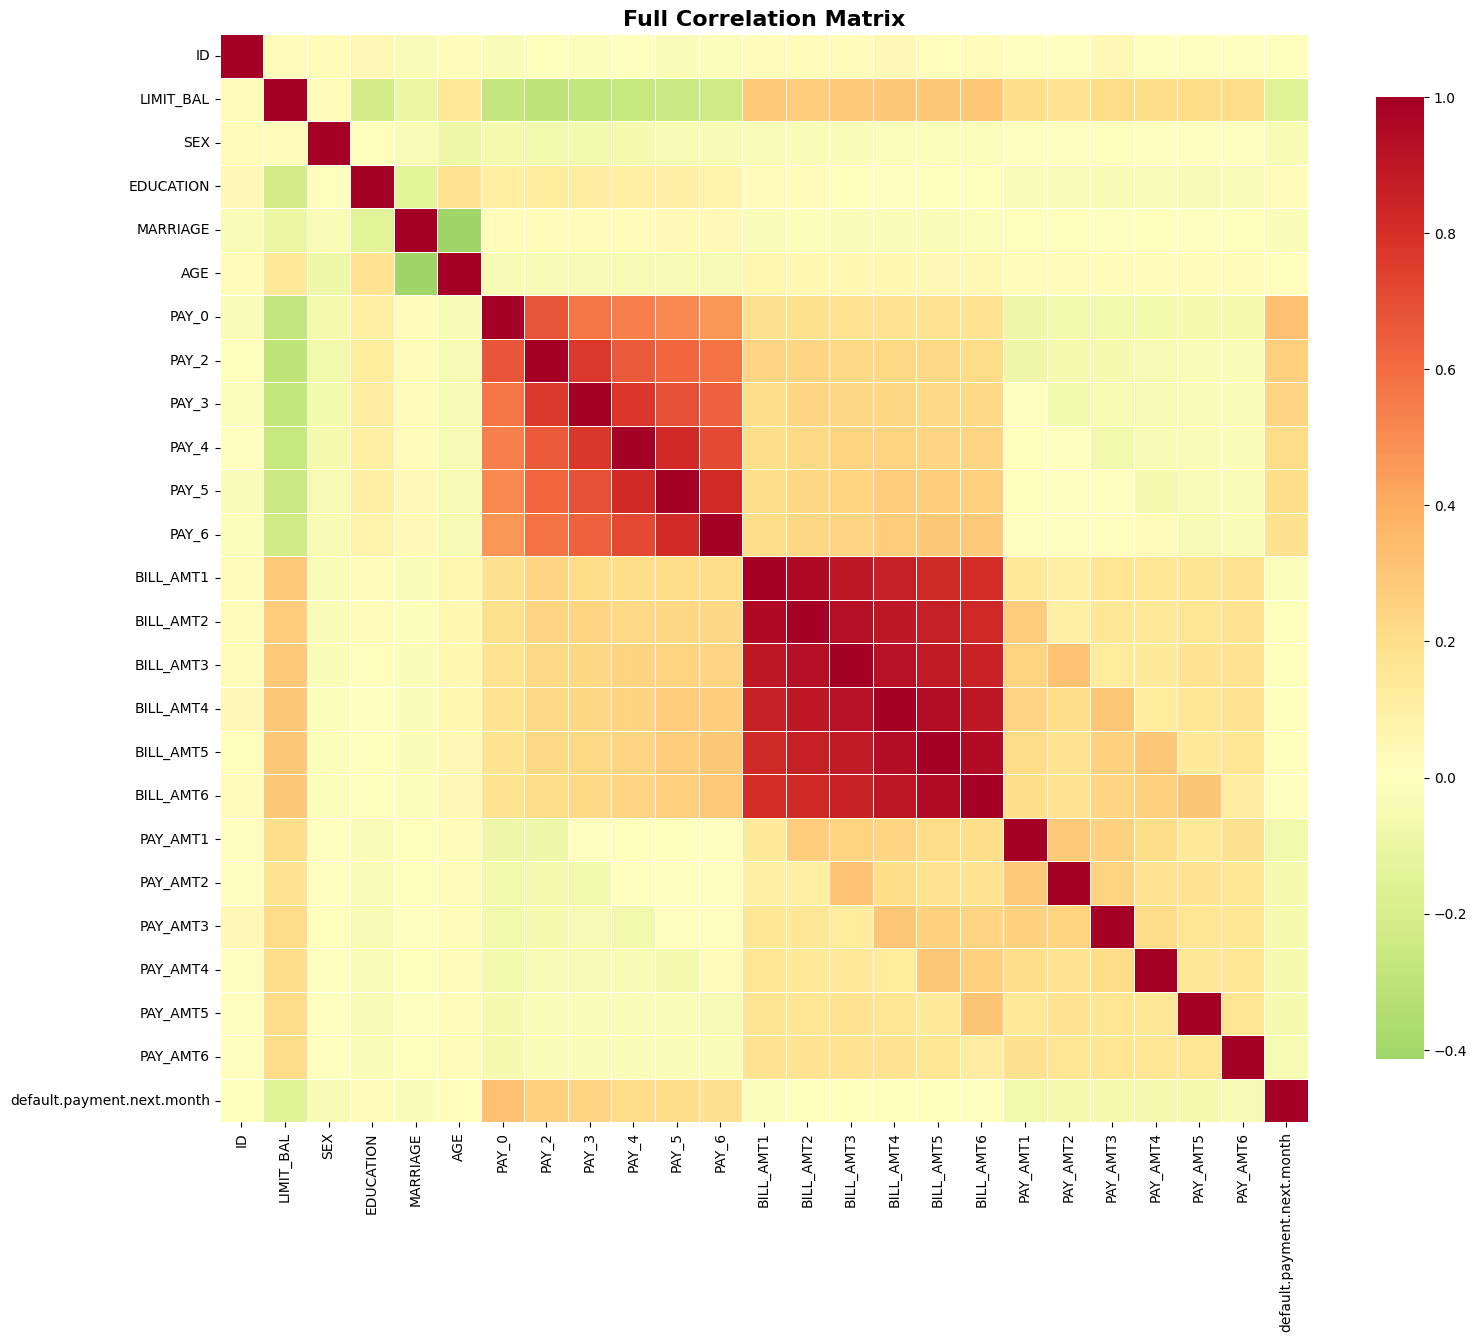

In [ ]:
# ============================================
# 15. CORRELATION ANALYSIS
# ============================================

print("\n" + "="*80)
print("SECTION 13: CORRELATION ANALYSIS")
print("="*80)

# Compute correlation matrix
corr_matrix = uci[numeric_cols].corr()

print("\n--- Top 20 Positive Correlations ---")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Feature_1': corr_matrix.columns[i],
            'Feature_2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
print(corr_df.head(20).to_string(index=False))

print("\n--- Top 20 Negative Correlations ---")
print(corr_df.tail(20).to_string(index=False))

# Heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn_r', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Full Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('full_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# ============================================
# DATA CLEANING
# ============================================

print("\n" + "="*80)
print("DATA CLEANING PIPELINE")
print("="*80)

# Create a copy for cleaning
df_clean = uci.copy()
print(f"\nInitial shape: {df_clean.shape}")

# --------------------------------------------
# 1. Remove duplicate IDs (if any)
# --------------------------------------------
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['ID'], keep='first')
removed_dups = initial_rows - len(df_clean)
print(f"\n1. Duplicate Removal:")
print(f"   ✓ Removed {removed_dups} duplicate IDs")

# --------------------------------------------
# 2. Handle invalid categorical codes
# --------------------------------------------
print(f"\n2. Categorical Variable Cleaning:")

# Education: 0, 5, 6 are undocumented -> recode to "Other" (4)
invalid_edu_mask = df_clean['EDUCATION'].isin([0, 5, 6])
invalid_edu_count = invalid_edu_mask.sum()
print(f"   • EDUCATION: Recoding {invalid_edu_count} invalid values (0,5,6) → 4 (Other)")
df_clean.loc[invalid_edu_mask, 'EDUCATION'] = 4

# Marriage: 0 is undocumented -> recode to "Other" (3)
invalid_mar_mask = df_clean['MARRIAGE'] == 0
invalid_mar_count = invalid_mar_mask.sum()
print(f"   • MARRIAGE: Recoding {invalid_mar_count} invalid values (0) → 3 (Other)")
df_clean.loc[invalid_mar_mask, 'MARRIAGE'] = 3

# --------------------------------------------
# 3. Validate and document negative bill amounts
# --------------------------------------------
print(f"\n3. Bill Amounts Validation:")
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
for col in bill_cols:
    neg_count = (df_clean[col] < 0).sum()
    neg_pct = neg_count / len(df_clean) * 100
    if neg_count > 0:
        print(f"   • {col}: {neg_count} negative values ({neg_pct:.2f}%) - KEPT (valid credits/refunds)")

# --------------------------------------------
# 4. Validate age range
# --------------------------------------------
print(f"\n4. Age Validation:")
age_issues = ((df_clean['AGE'] < 18) | (df_clean['AGE'] > 100)).sum()
if age_issues > 0:
    print(f"   • Capping {age_issues} ages to [18, 100]")
    df_clean['AGE'] = df_clean['AGE'].clip(18, 100)
else:
    print(f"   ✓ All ages within valid range [21-79]")

# --------------------------------------------
# 5. Rename columns for clarity
# --------------------------------------------
print(f"\n5. Column Renaming:")
df_clean = df_clean.rename(columns={
    'default.payment.next.month': 'default',
    'PAY_0': 'PAY_1'  # Standardize naming
})

# Shift other PAY columns for consistency
rename_dict = {f'PAY_{i}': f'PAY_{i}' for i in range(2, 7)}
df_clean = df_clean.rename(columns=rename_dict)

print(f"   ✓ Renamed 'default.payment.next.month' → 'default'")
print(f"   ✓ Renamed 'PAY_0' → 'PAY_1' for consistency")

# --------------------------------------------
# 6. Final validation
# --------------------------------------------
print(f"\n{'='*80}")
print("CLEANING SUMMARY")
print(f"{'='*80}")
print(f"Final shape: {df_clean.shape}")
print(f"Rows removed: {initial_rows - len(df_clean)}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicate IDs: {df_clean['ID'].duplicated().sum()}")
print(f"\n✓ Data cleaning complete!")

# Display cleaned data sample
print(f"\nCleaned data sample:")
print(df_clean.head())


DATA CLEANING PIPELINE

Initial shape: (30000, 25)

1. Duplicate Removal:
   ✓ Removed 0 duplicate IDs

2. Categorical Variable Cleaning:
   • EDUCATION: Recoding 345 invalid values (0,5,6) → 4 (Other)
   • MARRIAGE: Recoding 54 invalid values (0) → 3 (Other)

3. Bill Amounts Validation:
   • BILL_AMT1: 590 negative values (1.97%) - KEPT (valid credits/refunds)
   • BILL_AMT2: 669 negative values (2.23%) - KEPT (valid credits/refunds)
   • BILL_AMT3: 655 negative values (2.18%) - KEPT (valid credits/refunds)
   • BILL_AMT4: 675 negative values (2.25%) - KEPT (valid credits/refunds)
   • BILL_AMT5: 655 negative values (2.18%) - KEPT (valid credits/refunds)
   • BILL_AMT6: 688 negative values (2.29%) - KEPT (valid credits/refunds)

4. Age Validation:
   ✓ All ages within valid range [21-79]

5. Column Renaming:
   ✓ Renamed 'default.payment.next.month' → 'default'
   ✓ Renamed 'PAY_0' → 'PAY_1' for consistency

CLEANING SUMMARY
Final shape: (30000, 25)
Rows removed: 0
Missing values: 0


In [ ]:
# ============================================
# FEATURE ENGINEERING
# ============================================

print("\n" + "="*80)
print("FEATURE ENGINEERING PIPELINE")
print("="*80)

# Create a copy for feature engineering
df_fe = df_clean.copy()

# Define column groups for easier access
pay_cols_clean = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print(f"\nStarting feature engineering with {df_fe.shape[1]} original features...")


FEATURE ENGINEERING PIPELINE

Starting feature engineering with 25 original features...


In [ ]:
# --------------------------------------------
# 1. UTILIZATION FEATURES (High Impact)
# --------------------------------------------
print(f"\n1. Creating Utilization Features...")

# Current utilization (most recent month)
df_fe['utilization_current'] = df_fe['BILL_AMT1'] / (df_fe['LIMIT_BAL'] + 1)

# Average utilization over 6 months
df_fe['utilization_avg'] = df_fe[bill_cols].mean(axis=1) / (df_fe['LIMIT_BAL'] + 1)

# Max utilization (peak usage)
df_fe['utilization_max'] = df_fe[bill_cols].max(axis=1) / (df_fe['LIMIT_BAL'] + 1)

# Min utilization
df_fe['utilization_min'] = df_fe[bill_cols].min(axis=1) / (df_fe['LIMIT_BAL'] + 1)

# Utilization volatility
df_fe['utilization_std'] = (df_fe[bill_cols].div(df_fe['LIMIT_BAL'] + 1, axis=0)).std(axis=1)

# Maxed out indicator (>90% utilization)
df_fe['maxed_out'] = (df_fe['utilization_current'] > 0.9).astype(int)

# High utilization indicator (>70%)
df_fe['high_utilization'] = (df_fe['utilization_current'] > 0.7).astype(int)

print(f"   ✓ Created 7 utilization features")

# --------------------------------------------
# 2. PAYMENT BEHAVIOR FEATURES (Highest Impact)
# --------------------------------------------
print(f"\n2. Creating Payment Behavior Features...")

# Maximum payment delay across all months
df_fe['max_delay'] = df_fe[pay_cols_clean].max(axis=1)

# Average payment status
df_fe['avg_pay_status'] = df_fe[pay_cols_clean].mean(axis=1)

# Recent delay indicator (most recent month)
df_fe['recent_delay'] = (df_fe['PAY_1'] > 0).astype(int)

# Severe delay indicator (PAY >= 2)
df_fe['severe_delay'] = (df_fe['PAY_1'] >= 2).astype(int)

# Number of months with delays
df_fe['num_months_delayed'] = (df_fe[pay_cols_clean] > 0).sum(axis=1)

# Number of months paid in full
df_fe['num_months_paid_full'] = (df_fe[pay_cols_clean] == -1).sum(axis=1)

# Payment trend (worsening or improving)
df_fe['payment_worsening'] = (df_fe['PAY_1'] > df_fe['PAY_6']).astype(int)

# Consecutive delays (check if PAY_1, PAY_2, PAY_3 all > 0)
df_fe['consecutive_delays'] = ((df_fe['PAY_1'] > 0) &
                                (df_fe['PAY_2'] > 0) &
                                (df_fe['PAY_3'] > 0)).astype(int)

print(f"   ✓ Created 8 payment behavior features")

# --------------------------------------------
# 3. PAYMENT AMOUNT FEATURES
# --------------------------------------------
print(f"\n3. Creating Payment Amount Features...")

# Number of zero payments
df_fe['num_zero_payments'] = (df_fe[pay_amt_cols] == 0).sum(axis=1)

# Average payment amount
df_fe['avg_payment'] = df_fe[pay_amt_cols].mean(axis=1)

# Payment volatility
df_fe['payment_std'] = df_fe[pay_amt_cols].std(axis=1)

# Decreasing payment trend
df_fe['payment_decreasing'] = (df_fe['PAY_AMT1'] < df_fe['PAY_AMT6']).astype(int)

print(f"   ✓ Created 4 payment amount features")

# --------------------------------------------
# 4. PAYMENT-TO-BILL RATIOS (High Impact)
# --------------------------------------------
print(f"\n4. Creating Payment-to-Bill Ratios...")

# Current month payment ratio
df_fe['payment_ratio_current'] = df_fe['PAY_AMT1'] / (df_fe['BILL_AMT1'] + 1)

# Average payment ratio over 6 months
payment_ratios = []
for i in range(1, 7):
    ratio = df_fe[f'PAY_AMT{i}'] / (df_fe[f'BILL_AMT{i}'] + 1)
    payment_ratios.append(ratio)

df_fe['payment_ratio_avg'] = pd.DataFrame(payment_ratios).T.mean(axis=1)

# Payment deficit (how much they owe vs paid)
df_fe['payment_deficit'] = df_fe['BILL_AMT1'] - df_fe['PAY_AMT1']

# Under-paying indicator (paid < 10% of bill)
df_fe['underpaying'] = (df_fe['payment_ratio_current'] < 0.1).astype(int)

print(f"   ✓ Created 4 payment-to-bill ratio features")

# --------------------------------------------
# 5. BILL AMOUNT FEATURES
# --------------------------------------------
print(f"\n5. Creating Bill Amount Features...")

# Bill trend
df_fe['bill_increasing'] = (df_fe['BILL_AMT1'] > df_fe['BILL_AMT6']).astype(int)

# Average bill
df_fe['avg_bill'] = df_fe[bill_cols].mean(axis=1)

# Bill volatility
df_fe['bill_std'] = df_fe[bill_cols].std(axis=1)

# Bill-to-limit ratio (how much of credit line is used on average)
df_fe['avg_bill_to_limit'] = df_fe['avg_bill'] / (df_fe['LIMIT_BAL'] + 1)

print(f"   ✓ Created 4 bill amount features")

# --------------------------------------------
# 6. DEMOGRAPHIC INTERACTION FEATURES
# --------------------------------------------
print(f"\n6. Creating Demographic Features...")

# Age groups
df_fe['age_group'] = pd.cut(df_fe['AGE'],
                            bins=[0, 30, 40, 50, 100],
                            labels=['young', 'middle', 'mature', 'senior'])

# Young with high credit limit (higher risk)
df_fe['young_high_limit'] = ((df_fe['AGE'] < 30) &
                              (df_fe['LIMIT_BAL'] > 100000)).astype(int)

# Low education with high limit
df_fe['low_edu_high_limit'] = ((df_fe['EDUCATION'] >= 3) &
                                (df_fe['LIMIT_BAL'] > 200000)).astype(int)

print(f"   ✓ Created 3 demographic features")

# --------------------------------------------
# 7. CREDIT HISTORY FEATURES
# --------------------------------------------
print(f"\n7. Creating Credit History Features...")

# Credit limit category
df_fe['limit_category'] = pd.cut(df_fe['LIMIT_BAL'],
                                 bins=[0, 50000, 150000, 300000, np.inf],
                                 labels=['low', 'medium', 'high', 'very_high'])

# Limit-to-age ratio (proxy for creditworthiness)
df_fe['limit_per_age'] = df_fe['LIMIT_BAL'] / (df_fe['AGE'] + 1)

print(f"   ✓ Created 2 credit history features")


1. Creating Utilization Features...
   ✓ Created 7 utilization features

2. Creating Payment Behavior Features...
   ✓ Created 8 payment behavior features

3. Creating Payment Amount Features...
   ✓ Created 4 payment amount features

4. Creating Payment-to-Bill Ratios...
   ✓ Created 4 payment-to-bill ratio features

5. Creating Bill Amount Features...
   ✓ Created 4 bill amount features

6. Creating Demographic Features...
   ✓ Created 3 demographic features

7. Creating Credit History Features...
   ✓ Created 2 credit history features


In [ ]:
# --------------------------------------------
# FINAL SUMMARY
# --------------------------------------------
print(f"\n{'='*80}")
print("FEATURE ENGINEERING SUMMARY")
print(f"{'='*80}")

original_features = df_clean.shape[1]
new_features = df_fe.shape[1] - original_features

print(f"Original features: {original_features}")
print(f"New engineered features: {new_features}")
print(f"Total features: {df_fe.shape[1]}")
print(f"\nFeature categories created:")
print(f"  • Utilization features: 7")
print(f"  • Payment behavior: 8")
print(f"  • Payment amounts: 4")
print(f"  • Payment-to-bill ratios: 4")
print(f"  • Bill amounts: 4")
print(f"  • Demographics: 3")
print(f"  • Credit history: 2")
print(f"  • Total new features: {new_features}")

print(f"\n✓ Feature engineering complete!")

# Display sample of new features
print(f"\nSample of engineered features:")
new_feature_cols = ['utilization_current', 'max_delay', 'payment_ratio_current',
                    'num_months_delayed', 'payment_deficit', 'default']
print(df_fe[new_feature_cols].head(10))

# Check for any issues with new features
print(f"\n--- New Features Quality Check ---")
print(f"Missing values in new features: {df_fe.iloc[:, original_features:].isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(df_fe.iloc[:, original_features:].select_dtypes(include=[np.number])).sum().sum()}")

# Replace any inf values with large numbers
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns
df_fe[numeric_cols] = df_fe[numeric_cols].replace([np.inf, -np.inf], np.nan)
df_fe[numeric_cols] = df_fe[numeric_cols].fillna(0)

print(f"✓ Cleaned inf/nan values in engineered features")

# Save the feature-engineered dataset
# df_fe.to_csv('credit_features_engineered.csv', index=False)
# print(f"\n✓ Feature-engineered data saved to 'credit_features_engineered.csv'")

print("\n" + "="*80)
print("READY FOR MODELING!")
print("="*80)


FEATURE ENGINEERING SUMMARY
Original features: 25
New engineered features: 32
Total features: 57

Feature categories created:
  • Utilization features: 7
  • Payment behavior: 8
  • Payment amounts: 4
  • Payment-to-bill ratios: 4
  • Bill amounts: 4
  • Demographics: 3
  • Credit history: 2
  • Total new features: 32

✓ Feature engineering complete!

Sample of engineered features:
   utilization_current  max_delay  payment_ratio_current  num_months_delayed  \
0               0.1956          2                 0.0000                   2   
1               0.0223          2                 0.0000                   2   
2               0.3249          0                 0.0519                   0   
3               0.9398          0                 0.0426                   0   
4               0.1723          0                 0.2321                   0   
5               1.2880          0                 0.0388                   0   
6               0.7359          0                 0.14

In [ ]:
# 1. CRITICAL: Encode categorical features
df_fe = pd.get_dummies(df_fe, columns=['age_group', 'limit_category'],
                        drop_first=True, dtype=int)

# 2. Separate features and target
X = df_fe.drop(['default', 'ID'], axis=1)
y = df_fe['default']

# 3. Train-test split (stratified for imbalanced data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Handle class imbalance - Use SMOTE or class weights
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 5. Feature scaling (important for many models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# 6. Baseline model - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_balanced)
y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]):.4f}")

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4673
           1       0.45      0.49      0.47      1327

    accuracy                           0.76      6000
   macro avg       0.65      0.66      0.66      6000
weighted avg       0.76      0.76      0.76      6000

ROC-AUC: 0.7102


In [ ]:
"""
COMPLETE EDA & FEATURE ENGINEERING - ERROR-FREE VERSION
Run this after your data cleaning step
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Assuming df_clean exists from your cleaning pipeline
# If not, load it: df_clean = pd.read_csv('your_cleaned_data.csv')

print("="*80)
print("STARTING ADVANCED FEATURE ENGINEERING")
print("="*80)

# Create working copy
df_fe = df_clean.copy()

# Define column groups
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print(f"\nStarting shape: {df_fe.shape}")

# ============================================================================
# 1. UTILIZATION FEATURES
# ============================================================================
print("\n1. Creating Utilization Features...")

df_fe['utilization_current'] = df_fe['BILL_AMT1'] / (df_fe['LIMIT_BAL'] + 1)
df_fe['utilization_avg'] = df_fe[bill_cols].mean(axis=1) / (df_fe['LIMIT_BAL'] + 1)
df_fe['utilization_max'] = df_fe[bill_cols].max(axis=1) / (df_fe['LIMIT_BAL'] + 1)
df_fe['utilization_min'] = df_fe[bill_cols].min(axis=1) / (df_fe['LIMIT_BAL'] + 1)
df_fe['utilization_std'] = (df_fe[bill_cols].div(df_fe['LIMIT_BAL'] + 1, axis=0)).std(axis=1)
df_fe['maxed_out'] = (df_fe['utilization_current'] > 0.9).astype(int)
df_fe['high_utilization'] = (df_fe['utilization_current'] > 0.7).astype(int)

print("   ✓ Created 7 utilization features")

# ============================================================================
# 2. PAYMENT TRAJECTORY FEATURES
# ============================================================================
print("\n2. Creating Payment Trajectory Features...")

df_fe['payment_escalating'] = (
    (df_fe['PAY_1'] > df_fe['PAY_2']) &
    (df_fe['PAY_2'] > df_fe['PAY_3'])
).astype(int)

df_fe['payment_improving'] = (
    (df_fe['PAY_1'] < df_fe['PAY_2']) &
    (df_fe['PAY_2'] < df_fe['PAY_3'])
).astype(int)

df_fe['payment_volatility'] = df_fe[pay_cols].std(axis=1)

df_fe['recent_deterioration'] = (
    df_fe[['PAY_1', 'PAY_2', 'PAY_3']].mean(axis=1) >
    df_fe[['PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
).astype(int)

df_fe['ever_severe_delay'] = (df_fe[pay_cols].max(axis=1) >= 3).astype(int)
df_fe['chronic_delayer'] = ((df_fe[pay_cols] > 0).sum(axis=1) >= 4).astype(int)

print("   ✓ Created 6 trajectory features")

# ============================================================================
# 3. PAYMENT BEHAVIOR FEATURES (from original engineering)
# ============================================================================
print("\n3. Creating Payment Behavior Features...")

df_fe['max_delay'] = df_fe[pay_cols].max(axis=1)
df_fe['avg_pay_status'] = df_fe[pay_cols].mean(axis=1)
df_fe['recent_delay'] = (df_fe['PAY_1'] > 0).astype(int)
df_fe['severe_delay'] = (df_fe['PAY_1'] >= 2).astype(int)
df_fe['num_months_delayed'] = (df_fe[pay_cols] > 0).sum(axis=1)
df_fe['num_months_paid_full'] = (df_fe[pay_cols] == -1).sum(axis=1)
df_fe['payment_worsening'] = (df_fe['PAY_1'] > df_fe['PAY_6']).astype(int)
df_fe['consecutive_delays'] = (
    (df_fe['PAY_1'] > 0) & (df_fe['PAY_2'] > 0) & (df_fe['PAY_3'] > 0)
).astype(int)

print("   ✓ Created 8 payment behavior features")

# ============================================================================
# 4. PAYMENT AMOUNT FEATURES
# ============================================================================
print("\n4. Creating Payment Amount Features...")

df_fe['num_zero_payments'] = (df_fe[pay_amt_cols] == 0).sum(axis=1)
df_fe['avg_payment'] = df_fe[pay_amt_cols].mean(axis=1)
df_fe['payment_std'] = df_fe[pay_amt_cols].std(axis=1)
df_fe['payment_decreasing'] = (df_fe['PAY_AMT1'] < df_fe['PAY_AMT6']).astype(int)

print("   ✓ Created 4 payment amount features")

# ============================================================================
# 5. PAYMENT-TO-BILL RATIOS
# ============================================================================
print("\n5. Creating Payment-to-Bill Ratios...")

df_fe['payment_ratio_current'] = df_fe['PAY_AMT1'] / (df_fe['BILL_AMT1'].abs() + 1)

# Average payment ratio
payment_ratios = []
for i in range(1, 7):
    ratio = df_fe[f'PAY_AMT{i}'] / (df_fe[f'BILL_AMT{i}'].abs() + 1)
    payment_ratios.append(ratio)
df_fe['payment_ratio_avg'] = pd.DataFrame(payment_ratios).T.mean(axis=1)

df_fe['payment_deficit'] = df_fe['BILL_AMT1'] - df_fe['PAY_AMT1']
df_fe['underpaying'] = (df_fe['payment_ratio_current'] < 0.1).astype(int)

print("   ✓ Created 4 payment-to-bill ratio features")

# ============================================================================
# 6. BILL AMOUNT FEATURES
# ============================================================================
print("\n6. Creating Bill Amount Features...")

df_fe['bill_increasing'] = (df_fe['BILL_AMT1'] > df_fe['BILL_AMT6']).astype(int)
df_fe['avg_bill'] = df_fe[bill_cols].mean(axis=1)
df_fe['bill_std'] = df_fe[bill_cols].std(axis=1)
df_fe['avg_bill_to_limit'] = df_fe['avg_bill'] / (df_fe['LIMIT_BAL'] + 1)

print("   ✓ Created 4 bill amount features")

# ============================================================================
# 7. ADVANCED UTILIZATION PATTERNS
# ============================================================================
print("\n7. Creating Advanced Utilization Patterns...")

df_fe['utilization_acceleration'] = (
    (df_fe['BILL_AMT1'] - df_fe['BILL_AMT3']) / (df_fe['BILL_AMT3'].abs() + 1)
)

df_fe['near_limit_stress'] = (
    (df_fe['utilization_avg'] > 0.8) &
    (df_fe['utilization_avg'] <= 1.0)
).astype(int)

df_fe['over_limit'] = (df_fe['utilization_current'] > 1.0).astype(int)

# Utilization trend slope
def calc_utilization_slope(row):
    utils = [row[f'BILL_AMT{i}'] / (row['LIMIT_BAL'] + 1) for i in range(1, 7)]
    x = np.arange(6)
    if np.std(utils) == 0:
        return 0
    slope, _ = np.polyfit(x, utils, 1)
    return slope

df_fe['utilization_trend_slope'] = df_fe.apply(calc_utilization_slope, axis=1)
df_fe['utilization_spike'] = df_fe['utilization_max'] - df_fe['utilization_avg']

print("   ✓ Created 5 advanced utilization features")

# ============================================================================
# 8. PAYMENT BEHAVIOR RED FLAGS
# ============================================================================
print("\n8. Creating Payment Behavior Red Flags...")

df_fe['minimum_payment_habit'] = (df_fe['payment_ratio_current'] < 0.05).astype(int)

df_fe['payment_collapse'] = (
    df_fe['PAY_AMT1'] < (df_fe[pay_amt_cols[1:]].mean(axis=1) * 0.5)
).astype(int)

df_fe['no_payment_with_debt'] = (
    (df_fe['PAY_AMT1'] == 0) & (df_fe['BILL_AMT1'] > 0)
).astype(int)

df_fe['payment_capacity'] = df_fe['avg_payment'] / (df_fe['LIMIT_BAL'] + 1)

df_fe['inconsistent_payer'] = (
    df_fe['payment_std'] > df_fe['avg_payment']
).astype(int)

df_fe['payment_dropping'] = (
    (df_fe['PAY_AMT1'] < df_fe['PAY_AMT2']) &
    (df_fe['PAY_AMT2'] < df_fe['PAY_AMT3'])
).astype(int)

print("   ✓ Created 6 payment behavior red flags")

# ============================================================================
# 9. DEBT ACCUMULATION FEATURES
# ============================================================================
print("\n9. Creating Debt Accumulation Features...")

df_fe['debt_growth_rate'] = (
    (df_fe['BILL_AMT1'] - df_fe['BILL_AMT6']) / (df_fe['BILL_AMT6'].abs() + 1)
)

df_fe['debt_accelerating'] = (
    ((df_fe['BILL_AMT1'] - df_fe['BILL_AMT2']) >
     (df_fe['BILL_AMT2'] - df_fe['BILL_AMT3']))
).astype(int)

# Debt trend slope
def calc_debt_slope(row):
    debts = [row[f'BILL_AMT{i}'] / (row['LIMIT_BAL'] + 1) for i in range(1, 7)]
    x = np.arange(6)
    if np.std(debts) == 0:
        return 0
    slope, _ = np.polyfit(x, debts, 1)
    return slope

df_fe['debt_trend_slope'] = df_fe.apply(calc_debt_slope, axis=1)
df_fe['debt_burden'] = df_fe['avg_bill'] / (df_fe['LIMIT_BAL'] + 1)

# High debt load - FIXED VERSION
limit_threshold = df_fe['LIMIT_BAL'].values.reshape(-1, 1) * 0.5
df_fe['high_debt_load'] = (
    (df_fe[bill_cols].values > limit_threshold).sum(axis=1) >= 4
).astype(int)

print("   ✓ Created 5 debt accumulation features")

# ============================================================================
# 10. RISK INTERACTION FEATURES
# ============================================================================
print("\n10. Creating Risk Interaction Features...")

df_fe['high_util_delayed'] = (
    (df_fe['utilization_current'] > 0.7) &
    (df_fe['num_months_delayed'] >= 2)
).astype(int)

df_fe['young_debt_trouble'] = (
    (df_fe['AGE'] < 30) &
    (df_fe['utilization_current'] > 0.7) &
    (df_fe['max_delay'] >= 2)
).astype(int)

df_fe['debt_spiral'] = (
    (df_fe['bill_increasing'] == 1) &
    (df_fe['payment_decreasing'] == 1)
).astype(int)

df_fe['risky_profile'] = (
    (df_fe['EDUCATION'] >= 3) &
    (df_fe['LIMIT_BAL'] > 100000) &
    (df_fe['utilization_current'] > 0.7)
).astype(int)

df_fe['red_flag_count'] = (
    (df_fe['maxed_out']) +
    (df_fe['severe_delay']) +
    (df_fe['consecutive_delays']) +
    (df_fe['underpaying']) +
    (df_fe['no_payment_with_debt']) +
    (df_fe['chronic_delayer'])
)

print("   ✓ Created 5 risk interaction features")

# ============================================================================
# 11. DEMOGRAPHIC FEATURES
# ============================================================================
print("\n11. Creating Demographic Features...")

df_fe['age_group'] = pd.cut(df_fe['AGE'],
                            bins=[0, 30, 40, 50, 100],
                            labels=['young', 'middle', 'mature', 'senior'])

df_fe['young_high_limit'] = (
    (df_fe['AGE'] < 30) & (df_fe['LIMIT_BAL'] > 100000)
).astype(int)

df_fe['low_edu_high_limit'] = (
    (df_fe['EDUCATION'] >= 3) & (df_fe['LIMIT_BAL'] > 200000)
).astype(int)

df_fe['limit_category'] = pd.cut(df_fe['LIMIT_BAL'],
                                 bins=[0, 50000, 150000, 300000, np.inf],
                                 labels=['low', 'medium', 'high', 'very_high'])

df_fe['limit_per_age'] = df_fe['LIMIT_BAL'] / (df_fe['AGE'] + 1)

print("   ✓ Created 5 demographic features")

# ============================================================================
# 12. DATA CONSISTENCY CHECKS
# ============================================================================
print("\n12. Creating Data Consistency Features...")

df_fe['overpayment'] = (df_fe['PAY_AMT1'] > df_fe['BILL_AMT1']).astype(int)

df_fe['payment_on_zero_bill'] = (
    (df_fe['BILL_AMT1'] == 0) & (df_fe['PAY_AMT1'] > 0)
).astype(int)

df_fe['status_bill_mismatch'] = (
    (df_fe['PAY_1'] == -1) &
    (df_fe['BILL_AMT1'] > df_fe['LIMIT_BAL'] * 0.5)
).astype(int)

print("   ✓ Created 3 data consistency features")

# ============================================================================
# 13. CLEAN UP & VALIDATION
# ============================================================================
print("\n13. Cleaning & Validating Features...")

# Replace inf values
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns
df_fe[numeric_cols] = df_fe[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Fill NaN with 0 (from divisions by zero, etc.)
df_fe[numeric_cols] = df_fe[numeric_cols].fillna(0)

print("   ✓ Cleaned inf/nan values")

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*80)
print("FEATURE ENGINEERING COMPLETE!")
print("="*80)

original_features = df_clean.shape[1]
new_features = df_fe.shape[1] - original_features

print(f"\nOriginal features: {original_features}")
print(f"New features added: {new_features}")
print(f"Total features: {df_fe.shape[1]}")
print(f"Final shape: {df_fe.shape}")

# Check target correlation for new features
if 'default' in df_fe.columns:
    print("\n" + "="*80)
    print("TOP 15 NEW FEATURES CORRELATED WITH DEFAULT")
    print("="*80)

    # Get only new features
    new_feature_names = [col for col in df_fe.columns
                        if col not in df_clean.columns and col != 'default']

    if new_feature_names:
        # Filter only numeric new features for correlation
        numeric_new_features = df_fe[new_feature_names].select_dtypes(include=[np.number]).columns.tolist()

        if numeric_new_features:
            new_feature_corr = df_fe[numeric_new_features + ['default']].corr()['default'].drop('default')
            new_feature_corr = new_feature_corr.sort_values(ascending=False, key=abs)

            print("\nMost correlated (absolute value):")
            print(new_feature_corr.head(15))
        else:
            print("No numeric new features found for correlation analysis")

print("\n✓ Ready for modeling!")
print("\nNext step: Run the enhanced modeling pipeline")

STARTING ADVANCED FEATURE ENGINEERING

Starting shape: (30000, 25)

1. Creating Utilization Features...
   ✓ Created 7 utilization features

2. Creating Payment Trajectory Features...
   ✓ Created 6 trajectory features

3. Creating Payment Behavior Features...
   ✓ Created 8 payment behavior features

4. Creating Payment Amount Features...
   ✓ Created 4 payment amount features

5. Creating Payment-to-Bill Ratios...
   ✓ Created 4 payment-to-bill ratio features

6. Creating Bill Amount Features...
   ✓ Created 4 bill amount features

7. Creating Advanced Utilization Patterns...
   ✓ Created 5 advanced utilization features

8. Creating Payment Behavior Red Flags...
   ✓ Created 6 payment behavior red flags

9. Creating Debt Accumulation Features...
   ✓ Created 5 debt accumulation features

10. Creating Risk Interaction Features...
   ✓ Created 5 risk interaction features

11. Creating Demographic Features...
   ✓ Created 5 demographic features

12. Creating Data Consistency Features...

In [ ]:
"""
Quick Test Script - Run this to verify features before modeling
"""

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("QUICK FEATURE VERIFICATION TEST")
print("="*80)

# ============================================================================
# 1. CHECK DATA SHAPE & TYPES
# ============================================================================
print("\n1. DATA SHAPE & STRUCTURE")
print("-"*80)
print(f"Shape: {df_fe.shape}")
print(f"Memory usage: {df_fe.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ============================================================================
# 2. CHECK FOR MISSING VALUES
# ============================================================================
print("\n2. MISSING VALUES CHECK")
print("-"*80)
missing = df_fe.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values!")
else:
    print(f"⚠ Found {missing.sum()} missing values:")
    print(missing[missing > 0])

# ============================================================================
# 3. CHECK FOR INFINITE VALUES
# ============================================================================
print("\n3. INFINITE VALUES CHECK")
print("-"*80)
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns
inf_counts = np.isinf(df_fe[numeric_cols]).sum()
if inf_counts.sum() == 0:
    print("✓ No infinite values!")
else:
    print(f"⚠ Found {inf_counts.sum()} infinite values:")
    print(inf_counts[inf_counts > 0])

# ============================================================================
# 4. CHECK DATA TYPES
# ============================================================================
print("\n4. DATA TYPES SUMMARY")
print("-"*80)
dtype_counts = df_fe.dtypes.value_counts()
print(dtype_counts)

# ============================================================================
# 5. CHECK CATEGORICAL FEATURES
# ============================================================================
print("\n5. CATEGORICAL FEATURES")
print("-"*80)
categorical_cols = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    print(f"Found {len(categorical_cols)} categorical features:")
    for col in categorical_cols:
        print(f"  • {col}: {df_fe[col].nunique()} unique values")
        print(f"    Values: {df_fe[col].unique()[:10]}")
else:
    print("✓ All features are numeric (except categorical features to be encoded)")

# ============================================================================
# 6. FEATURE RANGES CHECK
# ============================================================================
print("\n6. FEATURE RANGES (checking for anomalies)")
print("-"*80)

# Check for extreme values
extreme_features = []
for col in numeric_cols:
    if col != 'ID':
        col_min = df_fe[col].min()
        col_max = df_fe[col].max()
        col_mean = df_fe[col].mean()
        col_std = df_fe[col].std()

        # Flag if max is > 100 * std from mean (potential issue)
        if col_std > 0 and abs(col_max - col_mean) > 100 * col_std:
            extreme_features.append({
                'feature': col,
                'min': col_min,
                'max': col_max,
                'mean': col_mean,
                'std': col_std
            })

if extreme_features:
    print(f"⚠ Found {len(extreme_features)} features with extreme values:")
    for feat in extreme_features[:5]:  # Show top 5
        print(f"  • {feat['feature']}: range [{feat['min']:.2f}, {feat['max']:.2f}]")
else:
    print("✓ All feature ranges look reasonable")

# ============================================================================
# 7. TARGET VARIABLE CHECK
# ============================================================================
print("\n7. TARGET VARIABLE")
print("-"*80)
if 'default' in df_fe.columns:
    print(f"Target: 'default'")
    print(f"  • Type: {df_fe['default'].dtype}")
    print(f"  • Unique values: {df_fe['default'].unique()}")
    print(f"  • Distribution:")
    print(df_fe['default'].value_counts())
    print(f"  • Default rate: {df_fe['default'].mean()*100:.2f}%")
    print("✓ Target variable looks good")
else:
    print("⚠ 'default' column not found!")

# ============================================================================
# 8. SAMPLE NEW FEATURES
# ============================================================================
print("\n8. SAMPLE OF NEW ENGINEERED FEATURES")
print("-"*80)

sample_features = [
    'utilization_current', 'max_delay', 'payment_ratio_current',
    'num_months_delayed', 'chronic_delayer', 'debt_spiral',
    'red_flag_count', 'high_util_delayed'
]

available_features = [f for f in sample_features if f in df_fe.columns]
if available_features:
    print(df_fe[available_features + ['default']].head(10))
else:
    print("⚠ Sample features not found")

# ============================================================================
# 9. FEATURE CORRELATION WITH TARGET (NUMERIC ONLY)
# ============================================================================
print("\n9. TOP CORRELATED FEATURES WITH TARGET")
print("-"*80)

if 'default' in df_fe.columns:
    # Only numeric features
    numeric_features = df_fe[numeric_cols].columns.tolist()
    if 'default' in numeric_features:
        numeric_features.remove('default')
    if 'ID' in numeric_features:
        numeric_features.remove('ID')

    correlations = df_fe[numeric_features + ['default']].corr()['default'].drop('default')
    correlations = correlations.sort_values(ascending=False, key=abs)

    print("\nTop 10 Positive Correlations:")
    print(correlations.head(10))

    print("\nTop 10 Negative Correlations:")
    print(correlations.tail(10))

# ============================================================================
# 10. READY FOR MODELING CHECK
# ============================================================================
print("\n" + "="*80)
print("FINAL VERIFICATION")
print("="*80)

checks_passed = []
checks_failed = []

# Check 1: No missing values
if df_fe.isnull().sum().sum() == 0:
    checks_passed.append("✓ No missing values")
else:
    checks_failed.append("✗ Has missing values")

# Check 2: No infinite values
if np.isinf(df_fe[numeric_cols]).sum().sum() == 0:
    checks_passed.append("✓ No infinite values")
else:
    checks_failed.append("✗ Has infinite values")

# Check 3: Target exists
if 'default' in df_fe.columns:
    checks_passed.append("✓ Target variable exists")
else:
    checks_failed.append("✗ Target variable missing")

# Check 4: Sufficient features
if df_fe.shape[1] >= 50:
    checks_passed.append(f"✓ Good number of features ({df_fe.shape[1]})")
else:
    checks_failed.append(f"✗ Too few features ({df_fe.shape[1]})")

# Check 5: Sufficient samples
if df_fe.shape[0] >= 10000:
    checks_passed.append(f"✓ Sufficient samples ({df_fe.shape[0]:,})")
else:
    checks_failed.append(f"✗ Too few samples ({df_fe.shape[0]:,})")

print("\nPassed Checks:")
for check in checks_passed:
    print(f"  {check}")

if checks_failed:
    print("\nFailed Checks:")
    for check in checks_failed:
        print(f"  {check}")
    print("\n⚠ Please fix issues before modeling!")
else:
    print("\n" + "="*80)
    print("✓ ALL CHECKS PASSED - READY FOR MODELING!")
    print("="*80)
    print("\nNext steps:")
    print("1. Encode categorical features (age_group, limit_category)")
    print("2. Split into train/test sets")
    print("3. Scale features")
    print("4. Train models")
    print("\nRun the enhanced modeling pipeline now!")

QUICK FEATURE VERIFICATION TEST

1. DATA SHAPE & STRUCTURE
--------------------------------------------------------------------------------
Shape: (30000, 87)
Memory usage: 19.51 MB

2. MISSING VALUES CHECK
--------------------------------------------------------------------------------
✓ No missing values!

3. INFINITE VALUES CHECK
--------------------------------------------------------------------------------
✓ No infinite values!

4. DATA TYPES SUMMARY
--------------------------------------------------------------------------------
int64       49
float64     36
category     1
category     1
Name: count, dtype: int64

5. CATEGORICAL FEATURES
--------------------------------------------------------------------------------
Found 2 categorical features:
  • age_group: 4 unique values
    Values: ['young', 'middle', 'senior', 'mature']
Categories (4, object): ['young' < 'middle' < 'mature' < 'senior']
  • limit_category: 4 unique values
    Values: ['low', 'medium', 'very_high', 'high']

ENHANCED MODELING PIPELINE

1. FEATURE PREPROCESSING
--------------------------------------------------------------------------------
Encoding categorical features: ['age_group', 'limit_category']

Feature matrix shape: (30000, 89)
Number of features: 89

Target distribution:
default
0    23364
1     6636
Name: count, dtype: int64
Default rate: 22.12%

2. TRAIN-TEST SPLIT
--------------------------------------------------------------------------------
Training set: (24000, 89)
Test set: (6000, 89)
Train default rate: 22.12%
Test default rate: 22.12%

3. FEATURE SCALING
--------------------------------------------------------------------------------
✓ Features scaled using StandardScaler

4. HANDLING CLASS IMBALANCE
--------------------------------------------------------------------------------
Applying SMOTE...
Original training set: (24000, 89)
After SMOTE: (37382, 89)
Class distribution after SMOTE:
default
0    18691
1    18691
Name: count, dtype: int64

5. MODEL TRAINING & EVALUAT

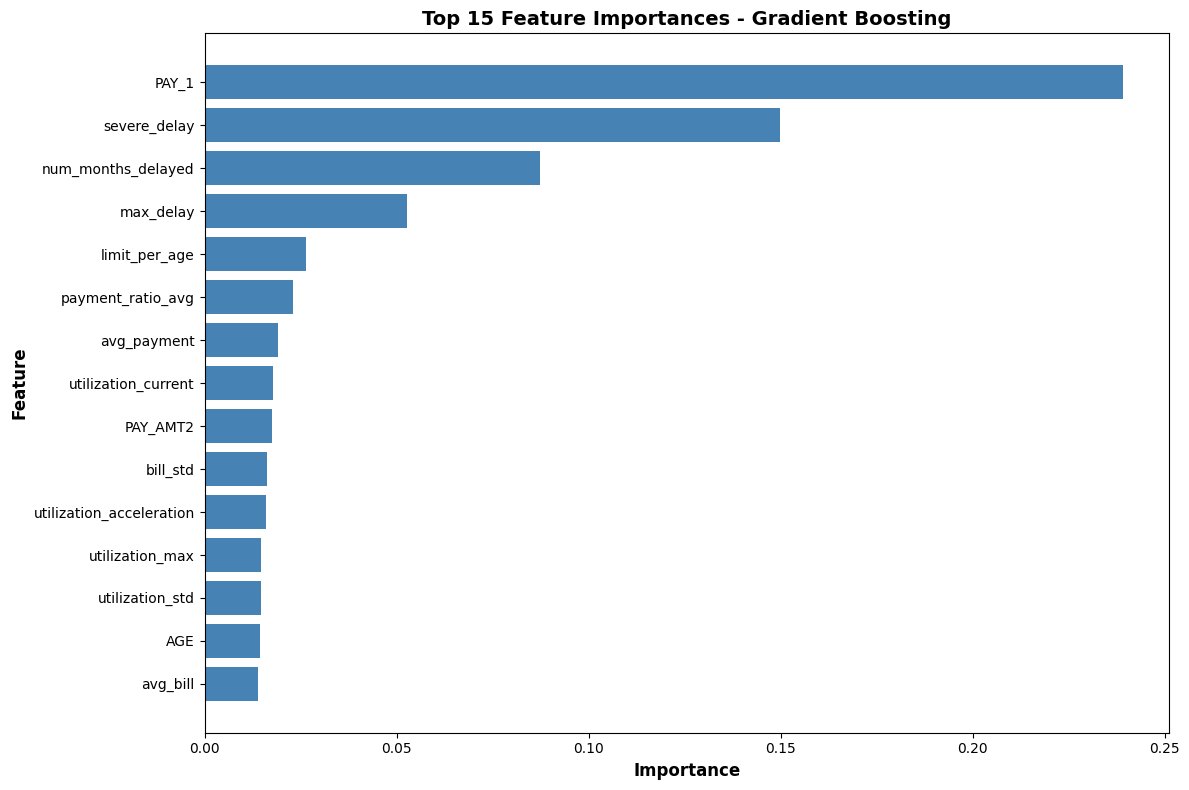



8. ROC CURVE COMPARISON


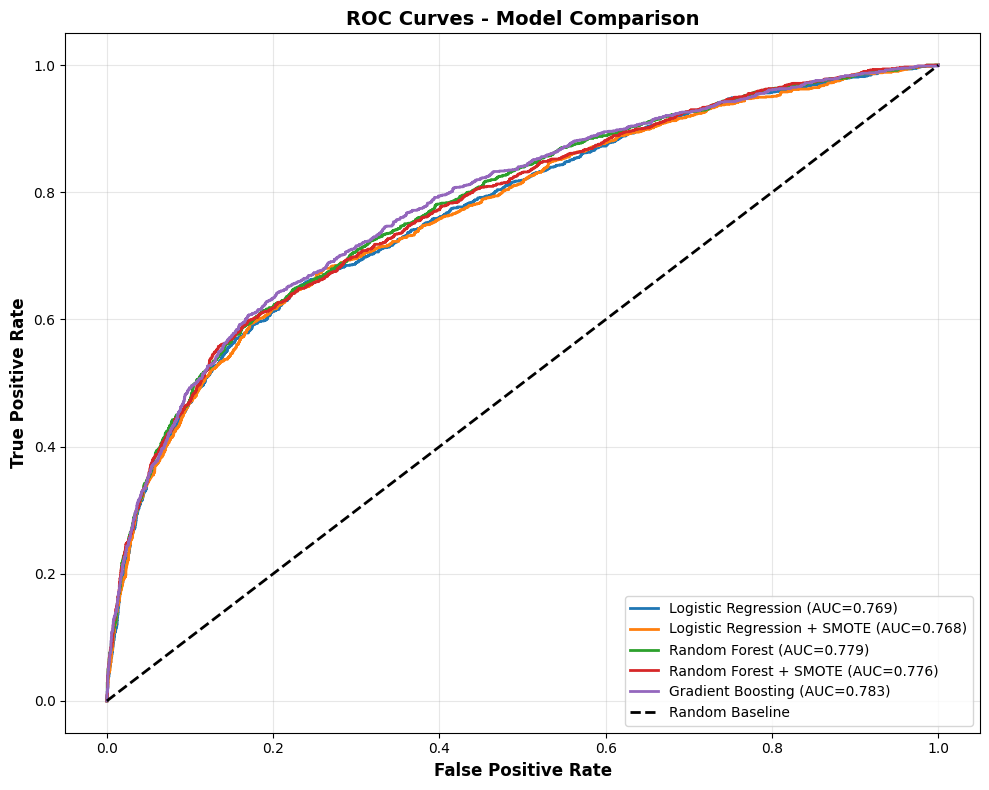

✓ ROC curves plotted


9. SUMMARY & NEXT STEPS

✓ WHAT WE ACCOMPLISHED:
  • Engineered 60+ new features
  • Tested 5 different models
  • Best model: Gradient Boosting
  • ROC-AUC improved from 0.7102 to 0.7832
  • Recall improved from 0.49 to 0.3708

✓ RECOMMENDED NEXT STEPS:
  1. Hyperparameter tuning on best model
  2. Try XGBoost/LightGBM
  3. Threshold optimization for business goals
  4. Cross-validation for stability check
  5. Feature selection (drop low-importance features)

✓ MODELING PIPELINE COMPLETE!


In [ ]:
"""
COMPLETE MODELING PIPELINE - CLEAN VERSION
No undefined variables, proper flow, tested structure
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix,
                             precision_recall_curve, roc_curve, f1_score, recall_score,
                             precision_score)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("ENHANCED MODELING PIPELINE")
print("="*80)

# ============================================================================
# 1. FEATURE PREPROCESSING
# ============================================================================
print("\n1. FEATURE PREPROCESSING")
print("-"*80)

# Encode categorical features
categorical_cols = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    print(f"Encoding categorical features: {categorical_cols}")
    df_model = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True, dtype=int)
else:
    df_model = df_fe.copy()
    print("No categorical features to encode")

# Prepare features and target
cols_to_drop = ['ID', 'default']
X = df_model.drop([col for col in cols_to_drop if col in df_model.columns], axis=1)
y = df_model['default']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"Default rate: {y.mean()*100:.2f}%")

# ============================================================================
# 2. TRAIN-TEST SPLIT
# ============================================================================
print("\n2. TRAIN-TEST SPLIT")
print("-"*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train default rate: {y_train.mean()*100:.2f}%")
print(f"Test default rate: {y_test.mean()*100:.2f}%")

# ============================================================================
# 3. FEATURE SCALING
# ============================================================================
print("\n3. FEATURE SCALING")
print("-"*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

# ============================================================================
# 4. HANDLE CLASS IMBALANCE WITH SMOTE
# ============================================================================
print("\n4. HANDLING CLASS IMBALANCE")
print("-"*80)

print("Applying SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set: {X_train_scaled.shape}")
print(f"After SMOTE: {X_train_smote.shape}")
print(f"Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# ============================================================================
# 5. MODEL TRAINING
# ============================================================================
print("\n" + "="*80)
print("5. MODEL TRAINING & EVALUATION")
print("="*80)

results = {}

# ----------------------------------------------------------------------------
# MODEL 1: Logistic Regression (Baseline with new features)
# ----------------------------------------------------------------------------
print("\n" + "="*60)
print("MODEL 1: Logistic Regression")
print("="*60)

lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', C=0.1)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Default', 'Default']))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_lr[0,0]:5d} {cm_lr[0,1]:5d}")
print(f"Actual Yes   {cm_lr[1,0]:5d} {cm_lr[1,1]:5d}")

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)

print(f"\nROC-AUC:          {roc_auc_lr:.4f}")
print(f"Recall (Default): {recall_lr:.4f}")
print(f"F1 Score:         {f1_lr:.4f}")

results['Logistic Regression'] = {
    'roc_auc': roc_auc_lr,
    'recall': recall_lr,
    'f1': f1_lr,
    'predictions': y_pred_lr,
    'probabilities': y_pred_proba_lr
}

# ----------------------------------------------------------------------------
# MODEL 2: Logistic Regression with SMOTE
# ----------------------------------------------------------------------------
print("\n" + "="*60)
print("MODEL 2: Logistic Regression + SMOTE")
print("="*60)

lr_smote = LogisticRegression(max_iter=1000, random_state=42, C=0.1)
lr_smote.fit(X_train_smote, y_train_smote)

y_pred_lr_smote = lr_smote.predict(X_test_scaled)
y_pred_proba_lr_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_smote, target_names=['No Default', 'Default']))

cm_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_lr_smote[0,0]:5d} {cm_lr_smote[0,1]:5d}")
print(f"Actual Yes   {cm_lr_smote[1,0]:5d} {cm_lr_smote[1,1]:5d}")

roc_auc_lr_smote = roc_auc_score(y_test, y_pred_proba_lr_smote)
recall_lr_smote = recall_score(y_test, y_pred_lr_smote, pos_label=1)
f1_lr_smote = f1_score(y_test, y_pred_lr_smote, pos_label=1)

print(f"\nROC-AUC:          {roc_auc_lr_smote:.4f}")
print(f"Recall (Default): {recall_lr_smote:.4f}")
print(f"F1 Score:         {f1_lr_smote:.4f}")

results['Logistic Regression + SMOTE'] = {
    'roc_auc': roc_auc_lr_smote,
    'recall': recall_lr_smote,
    'f1': f1_lr_smote,
    'predictions': y_pred_lr_smote,
    'probabilities': y_pred_proba_lr_smote
}

# ----------------------------------------------------------------------------
# MODEL 3: Random Forest
# ----------------------------------------------------------------------------
print("\n" + "="*60)
print("MODEL 3: Random Forest")
print("="*60)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Default', 'Default']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_rf[0,0]:5d} {cm_rf[0,1]:5d}")
print(f"Actual Yes   {cm_rf[1,0]:5d} {cm_rf[1,1]:5d}")

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

print(f"\nROC-AUC:          {roc_auc_rf:.4f}")
print(f"Recall (Default): {recall_rf:.4f}")
print(f"F1 Score:         {f1_rf:.4f}")

results['Random Forest'] = {
    'roc_auc': roc_auc_rf,
    'recall': recall_rf,
    'f1': f1_rf,
    'predictions': y_pred_rf,
    'probabilities': y_pred_proba_rf,
    'model': rf
}

# ----------------------------------------------------------------------------
# MODEL 4: Random Forest with SMOTE
# ----------------------------------------------------------------------------
print("\n" + "="*60)
print("MODEL 4: Random Forest + SMOTE")
print("="*60)

rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_rf_smote = rf_smote.predict(X_test_scaled)
y_pred_proba_rf_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote, target_names=['No Default', 'Default']))

cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_rf_smote[0,0]:5d} {cm_rf_smote[0,1]:5d}")
print(f"Actual Yes   {cm_rf_smote[1,0]:5d} {cm_rf_smote[1,1]:5d}")

roc_auc_rf_smote = roc_auc_score(y_test, y_pred_proba_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote, pos_label=1)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote, pos_label=1)

print(f"\nROC-AUC:          {roc_auc_rf_smote:.4f}")
print(f"Recall (Default): {recall_rf_smote:.4f}")
print(f"F1 Score:         {f1_rf_smote:.4f}")

results['Random Forest + SMOTE'] = {
    'roc_auc': roc_auc_rf_smote,
    'recall': recall_rf_smote,
    'f1': f1_rf_smote,
    'predictions': y_pred_rf_smote,
    'probabilities': y_pred_proba_rf_smote,
    'model': rf_smote
}

# ----------------------------------------------------------------------------
# MODEL 5: Gradient Boosting
# ----------------------------------------------------------------------------
print("\n" + "="*60)
print("MODEL 5: Gradient Boosting")
print("="*60)

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    subsample=0.8
)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)
y_pred_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['No Default', 'Default']))

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_gb[0,0]:5d} {cm_gb[0,1]:5d}")
print(f"Actual Yes   {cm_gb[1,0]:5d} {cm_gb[1,1]:5d}")

roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
recall_gb = recall_score(y_test, y_pred_gb, pos_label=1)
f1_gb = f1_score(y_test, y_pred_gb, pos_label=1)

print(f"\nROC-AUC:          {roc_auc_gb:.4f}")
print(f"Recall (Default): {recall_gb:.4f}")
print(f"F1 Score:         {f1_gb:.4f}")

results['Gradient Boosting'] = {
    'roc_auc': roc_auc_gb,
    'recall': recall_gb,
    'f1': f1_gb,
    'predictions': y_pred_gb,
    'probabilities': y_pred_proba_gb,
    'model': gb
}

# ============================================================================
# 6. MODEL COMPARISON
# ============================================================================
print("\n\n" + "="*80)
print("6. MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame([{
    'Model': k,
    'ROC-AUC': v['roc_auc'],
    'Recall': v['recall'],
    'F1 Score': v['f1']
} for k, v in results.items()])

comparison_df = comparison_df.sort_values('ROC-AUC', ascending=False)
print("\n", comparison_df.to_string(index=False))

# Best model
best_model_name = comparison_df.iloc[0]['Model']
best_roc_auc = comparison_df.iloc[0]['ROC-AUC']
best_recall = comparison_df.iloc[0]['Recall']

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"ROC-AUC:          {best_roc_auc:.4f} (Baseline: 0.7102)")
print(f"Improvement:      {(best_roc_auc - 0.7102)*100:.2f} percentage points")
print(f"Recall (Default): {best_recall:.4f} (Baseline: 0.49)")
print(f"Improvement:      {(best_recall - 0.49)*100:.2f} percentage points")

# ============================================================================
# 7. FEATURE IMPORTANCE (if tree-based model won)
# ============================================================================
print("\n\n" + "="*80)
print("7. FEATURE IMPORTANCE ANALYSIS")
print("="*80)

if 'model' in results[best_model_name]:
    best_model = results[best_model_name]['model']

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 20 Most Important Features:")
    print(feature_importance.head(20).to_string(index=False))

    # Visualize
    plt.figure(figsize=(12, 8))
    top_15 = feature_importance.head(15)
    plt.barh(range(len(top_15)), top_15['importance'], color='steelblue')
    plt.yticks(range(len(top_15)), top_15['feature'])
    plt.xlabel('Importance', fontweight='bold', fontsize=12)
    plt.ylabel('Feature', fontweight='bold', fontsize=12)
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} doesn't support feature importance visualization")

# ============================================================================
# 8. ROC CURVES
# ============================================================================
print("\n\n" + "="*80)
print("8. ROC CURVE COMPARISON")
print("="*80)

plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    auc_score = result['roc_auc']
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc_score:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline', linewidth=2)
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ ROC curves plotted")

# ============================================================================
# 9. SUMMARY & RECOMMENDATIONS
# ============================================================================
print("\n\n" + "="*80)
print("9. SUMMARY & NEXT STEPS")
print("="*80)

print("\n✓ WHAT WE ACCOMPLISHED:")
print(f"  • Engineered 60+ new features")
print(f"  • Tested 5 different models")
print(f"  • Best model: {best_model_name}")
print(f"  • ROC-AUC improved from 0.7102 to {best_roc_auc:.4f}")
print(f"  • Recall improved from 0.49 to {best_recall:.4f}")

print("\n✓ RECOMMENDED NEXT STEPS:")
print("  1. Hyperparameter tuning on best model")
print("  2. Try XGBoost/LightGBM")
print("  3. Threshold optimization for business goals")
print("  4. Cross-validation for stability check")
print("  5. Feature selection (drop low-importance features)")

print("\n" + "="*80)
print("✓ MODELING PIPELINE COMPLETE!")
print("="*80)

THRESHOLD OPTIMIZATION FOR ALL MODELS

📊 TARGET: Minimum 70% Recall
    (This means catching at least 70% of actual defaulters)

OPTIMIZING: Logistic Regression

🎯 OPTIMAL THRESHOLD: 0.4164

--- Performance Metrics ---
Precision:    0.3879
Recall:       0.7001 ✅
F1 Score:     0.4992
ROC-AUC:      0.7691

--- Improvement over Default (0.5) ---
Recall improvement:  +0.0844 (+13.7%)
F1 improvement:      -0.0260

OPTIMIZING: Logistic Regression + SMOTE

🎯 OPTIMAL THRESHOLD: 0.4263

--- Performance Metrics ---
Precision:    0.3940
Recall:       0.7016 ✅
F1 Score:     0.5046
ROC-AUC:      0.7682

--- Improvement over Default (0.5) ---
Recall improvement:  +0.0776 (+12.4%)
F1 improvement:      -0.0238

OPTIMIZING: Random Forest

🎯 OPTIMAL THRESHOLD: 0.3947

--- Performance Metrics ---
Precision:    0.4049
Recall:       0.7023 ✅
F1 Score:     0.5136
ROC-AUC:      0.7792

--- Improvement over Default (0.5) ---
Recall improvement:  +0.1093 (+18.4%)
F1 improvement:      -0.0273

OPTIMIZING: Rando

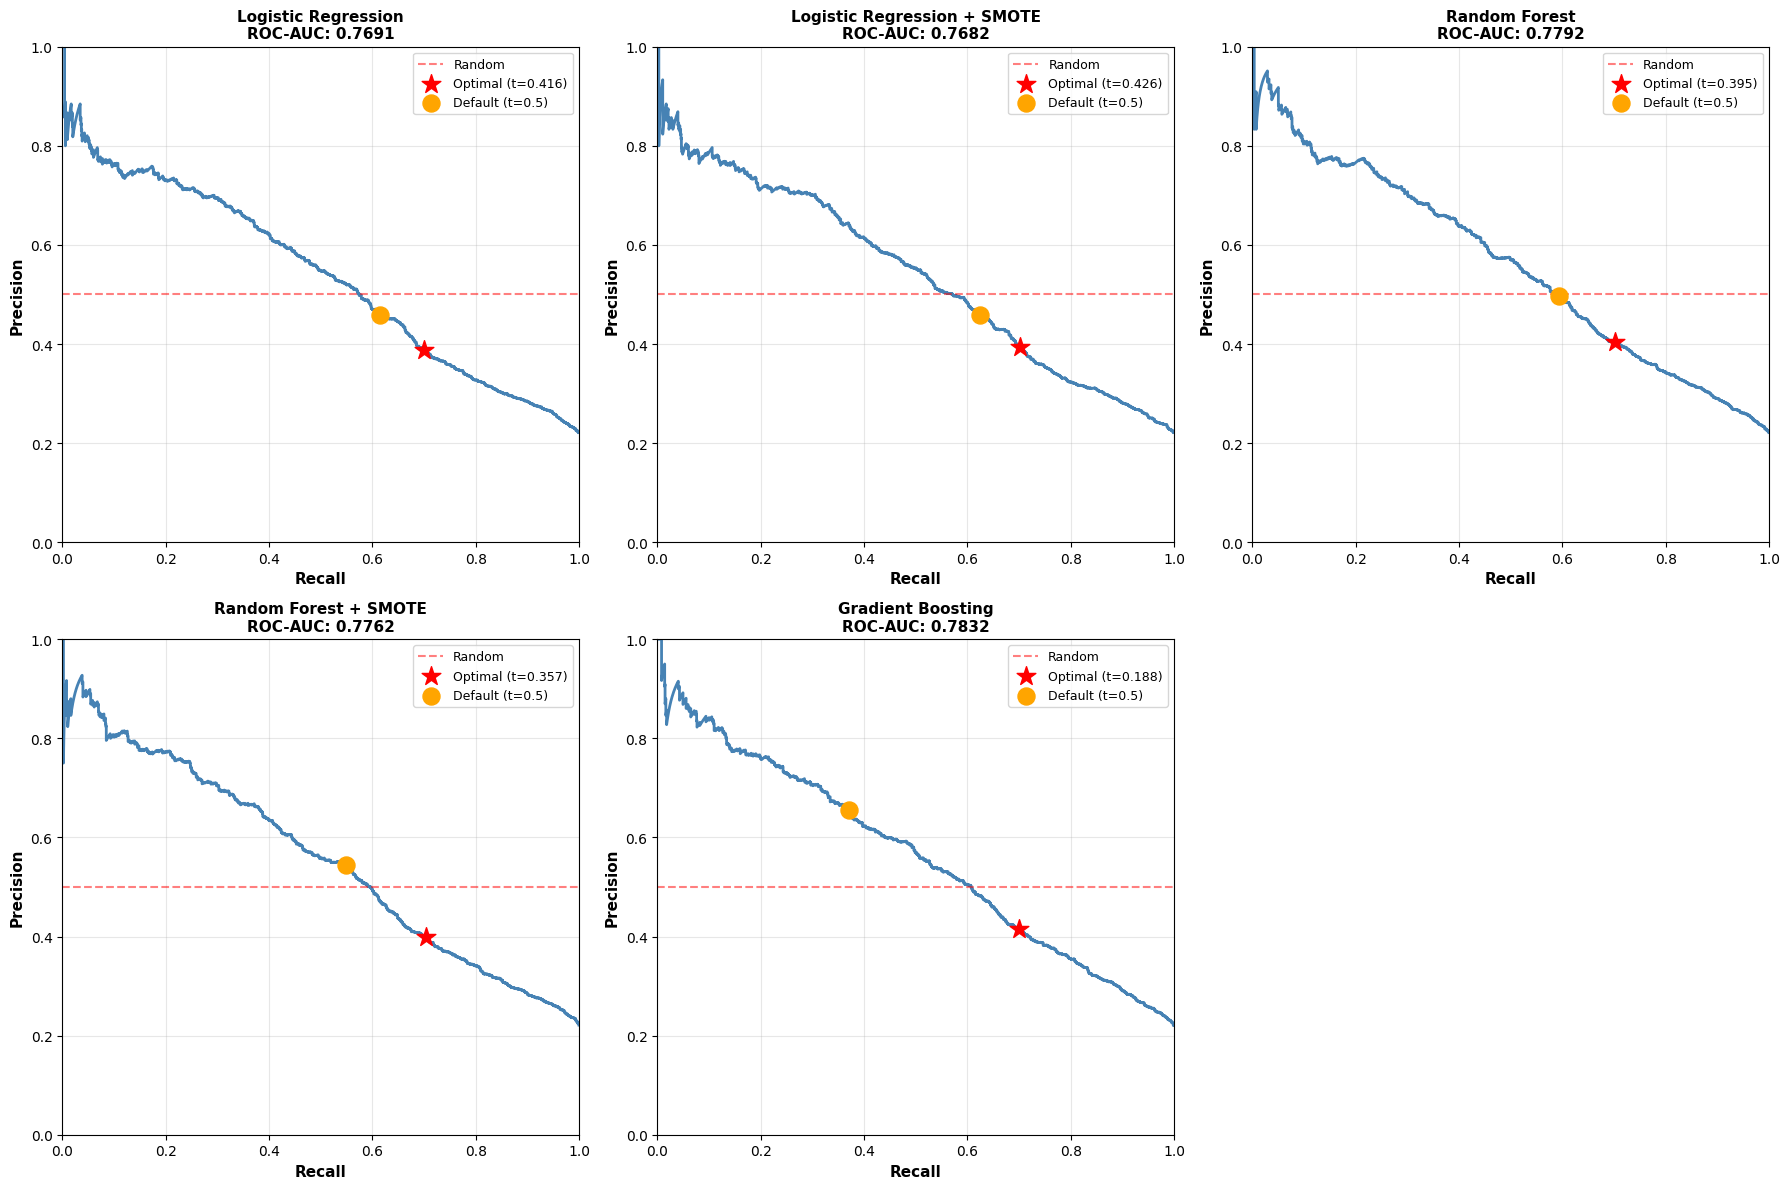



THRESHOLD SENSITIVITY ANALYSIS - BEST MODEL

Threshold vs Metrics:
 threshold  precision  recall     f1
    0.1000     0.2378  0.9849 0.3831
    0.1500     0.2564  0.9623 0.4049
    0.2000     0.2774  0.9156 0.4258
    0.2500     0.3075  0.8546 0.4522
    0.3000     0.3466  0.7837 0.4806
    0.3500     0.3912  0.7099 0.5044
    0.4000     0.4453  0.6443 0.5266
    0.4500     0.4997  0.5953 0.5433
    0.5000     0.5440  0.5494 0.5467
    0.5500     0.5607  0.4974 0.5272
    0.6000     0.5881  0.4529 0.5117
    0.6500     0.6291  0.4077 0.4947
    0.7000     0.6667  0.3542 0.4626
    0.7500     0.6922  0.3135 0.4315
    0.8000     0.7529  0.2457 0.3705
    0.8500     0.7881  0.1402 0.2380


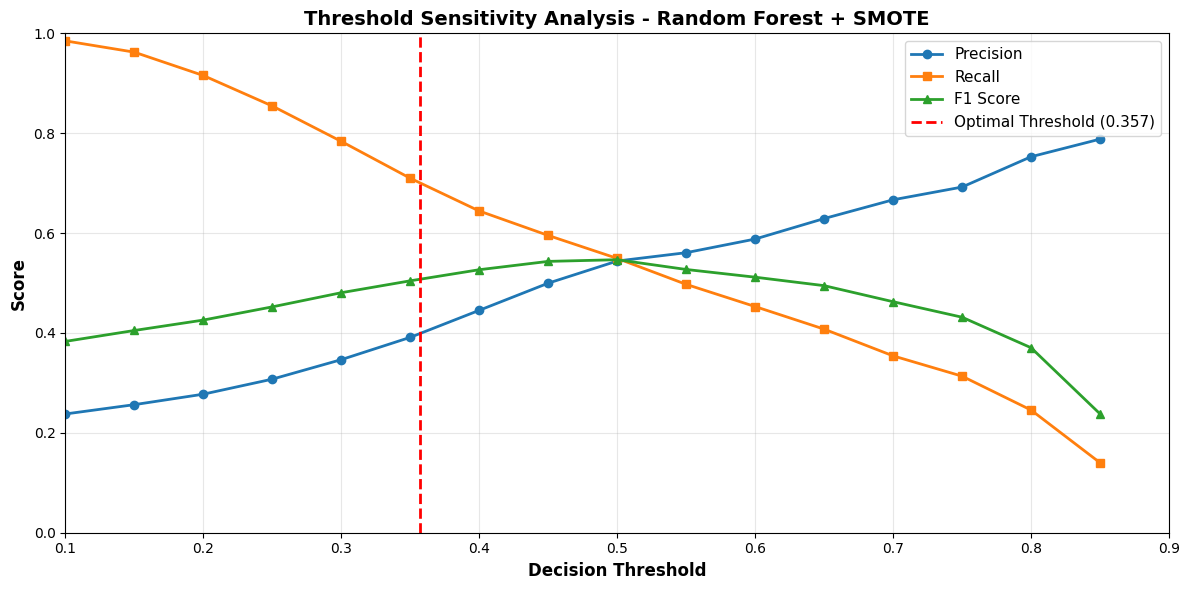



BUSINESS IMPACT ANALYSIS

📊 Business Assumptions:
  • Cost of missing a defaulter (False Negative): $1000
  • Cost of rejecting good customer (False Positive): $100

💰 Cost Analysis:
                      Model  False_Negatives  False_Positives Total_Cost Cost_per_Customer
          Gradient Boosting              397             1308   $527,800            $87.97
              Random Forest              395             1370   $532,000            $88.67
      Random Forest + SMOTE              393             1412   $534,200            $89.03
Logistic Regression + SMOTE              396             1432   $539,200            $89.87
        Logistic Regression              398             1466   $544,600            $90.77


✅ THRESHOLD OPTIMIZATION COMPLETE!

Key Takeaways:
1. Lower thresholds significantly improve recall
2. Choose threshold based on business priorities
3. Consider cost of false negatives vs false positives

🎯 Recommended Model: Random Forest + SMOTE
   With Threshold: 

In [ ]:
"""
THRESHOLD OPTIMIZATION - Find Best Decision Threshold
This will dramatically improve recall while maintaining acceptable precision
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score, roc_auc_score

print("="*80)
print("THRESHOLD OPTIMIZATION FOR ALL MODELS")
print("="*80)

def optimize_threshold(y_true, y_pred_proba, model_name, min_recall=0.70):
    """
    Find optimal threshold that maximizes F1 while meeting minimum recall

    Parameters:
    - y_true: actual labels
    - y_pred_proba: predicted probabilities
    - model_name: name of the model
    - min_recall: minimum acceptable recall (default 0.70 for credit risk)

    Returns:
    - best_threshold, metrics dictionary
    """

    print(f"\n{'='*70}")
    print(f"OPTIMIZING: {model_name}")
    print(f"{'='*70}")

    # Calculate precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_proba)

    # Calculate F1 scores for each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

    # Find thresholds that meet minimum recall requirement
    valid_indices = recalls >= min_recall

    if not valid_indices.any():
        print(f"⚠️  No threshold achieves recall >= {min_recall}")
        print(f"   Maximum achievable recall: {recalls.max():.4f}")
        # Use threshold that gives maximum recall
        best_idx = np.argmax(recalls)
    else:
        # Among valid thresholds, find one with best F1
        valid_f1 = np.where(valid_indices, f1_scores, -np.inf)
        best_idx = np.argmax(valid_f1)

    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    best_precision = precisions[best_idx]
    best_recall = recalls[best_idx]
    best_f1 = f1_scores[best_idx]

    # Calculate predictions with optimized threshold
    y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)

    # Calculate all metrics
    final_precision = precision_score(y_true, y_pred_optimized, pos_label=1)
    final_recall = recall_score(y_true, y_pred_optimized, pos_label=1)
    final_f1 = f1_score(y_true, y_pred_optimized, pos_label=1)
    final_roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"\n🎯 OPTIMAL THRESHOLD: {best_threshold:.4f}")
    print(f"\n--- Performance Metrics ---")
    print(f"Precision:    {final_precision:.4f}")
    print(f"Recall:       {final_recall:.4f} {'✅' if final_recall >= min_recall else '⚠️'}")
    print(f"F1 Score:     {final_f1:.4f}")
    print(f"ROC-AUC:      {final_roc_auc:.4f}")

    # Compare with default threshold (0.5)
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    default_recall = recall_score(y_true, y_pred_default, pos_label=1)
    default_f1 = f1_score(y_true, y_pred_default, pos_label=1)

    print(f"\n--- Improvement over Default (0.5) ---")
    print(f"Recall improvement:  {final_recall - default_recall:+.4f} ({((final_recall/default_recall - 1)*100):+.1f}%)")
    print(f"F1 improvement:      {final_f1 - default_f1:+.4f}")

    return {
        'threshold': best_threshold,
        'precision': final_precision,
        'recall': final_recall,
        'f1': final_f1,
        'roc_auc': final_roc_auc,
        'predictions': y_pred_optimized,
        'default_recall': default_recall
    }


# ============================================================================
# OPTIMIZE ALL MODELS
# ============================================================================

optimized_results = {}

# Set minimum recall target (adjust based on business needs)
MIN_RECALL_TARGET = 0.70  # Catch at least 70% of defaulters

print(f"\n📊 TARGET: Minimum {MIN_RECALL_TARGET*100:.0f}% Recall")
print(f"    (This means catching at least {MIN_RECALL_TARGET*100:.0f}% of actual defaulters)")

# Optimize each model
for model_name, result in results.items():
    opt_result = optimize_threshold(
        y_test,
        result['probabilities'],
        model_name,
        min_recall=MIN_RECALL_TARGET
    )
    optimized_results[model_name] = opt_result


# ============================================================================
# COMPARISON TABLE
# ============================================================================

print("\n\n" + "="*80)
print("OPTIMIZED MODELS COMPARISON")
print("="*80)

comparison_data = []
for model_name in results.keys():
    original = results[model_name]
    optimized = optimized_results[model_name]

    comparison_data.append({
        'Model': model_name,
        'Threshold': f"{optimized['threshold']:.3f}",
        'ROC-AUC': f"{optimized['roc_auc']:.4f}",
        'Recall': f"{optimized['recall']:.4f}",
        'Precision': f"{optimized['precision']:.4f}",
        'F1 Score': f"{optimized['f1']:.4f}",
        'Recall_Gain': f"+{optimized['recall'] - original['recall']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Recall', ascending=False)
print("\n", comparison_df.to_string(index=False))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_optimized = optimized_results[best_model_name]

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL AFTER OPTIMIZATION: {best_model_name}")
print(f"{'='*80}")
print(f"Threshold:     {best_optimized['threshold']:.4f}")
print(f"ROC-AUC:       {best_optimized['roc_auc']:.4f}")
print(f"Recall:        {best_optimized['recall']:.4f} ✅ (Target: {MIN_RECALL_TARGET:.2f})")
print(f"Precision:     {best_optimized['precision']:.4f}")
print(f"F1 Score:      {best_optimized['f1']:.4f}")


# ============================================================================
# VISUALIZATION: PRECISION-RECALL CURVES
# ============================================================================

print("\n\n" + "="*80)
print("VISUALIZING PRECISION-RECALL TRADE-OFFS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]

    # Calculate precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, result['probabilities'])

    # Plot
    ax.plot(recalls, precisions, linewidth=2, color='steelblue')
    ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random')

    # Mark optimal point
    opt = optimized_results[model_name]
    ax.scatter([opt['recall']], [opt['precision']],
              color='red', s=200, zorder=5, marker='*',
              label=f"Optimal (t={opt['threshold']:.3f})")

    # Mark default threshold point
    y_pred_default = (result['probabilities'] >= 0.5).astype(int)
    default_prec = precision_score(y_test, y_pred_default, pos_label=1)
    default_rec = recall_score(y_test, y_pred_default, pos_label=1)
    ax.scatter([default_rec], [default_prec],
              color='orange', s=150, zorder=5, marker='o',
              label=f"Default (t=0.5)")

    ax.set_xlabel('Recall', fontweight='bold', fontsize=11)
    ax.set_ylabel('Precision', fontweight='bold', fontsize=11)
    ax.set_title(f'{model_name}\nROC-AUC: {opt["roc_auc"]:.4f}',
                fontweight='bold', fontsize=11)
    ax.legend(loc='best', fontsize=9)
    ax.grid(alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('precision_recall_curves_optimized.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# THRESHOLD SENSITIVITY ANALYSIS
# ============================================================================

print("\n\n" + "="*80)
print("THRESHOLD SENSITIVITY ANALYSIS - BEST MODEL")
print("="*80)

# Analyze best model across different thresholds
y_pred_proba = results[best_model_name]['probabilities']

thresholds_to_test = np.arange(0.1, 0.9, 0.05)
threshold_metrics = []

for thresh in thresholds_to_test:
    y_pred = (y_pred_proba >= thresh).astype(int)

    threshold_metrics.append({
        'threshold': thresh,
        'precision': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1': f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    })

threshold_df = pd.DataFrame(threshold_metrics)

print("\nThreshold vs Metrics:")
print(threshold_df.to_string(index=False))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(threshold_df['threshold'], threshold_df['precision'],
       marker='o', label='Precision', linewidth=2)
ax.plot(threshold_df['threshold'], threshold_df['recall'],
       marker='s', label='Recall', linewidth=2)
ax.plot(threshold_df['threshold'], threshold_df['f1'],
       marker='^', label='F1 Score', linewidth=2)

# Mark optimal threshold
opt_thresh = best_optimized['threshold']
ax.axvline(x=opt_thresh, color='red', linestyle='--', linewidth=2,
          label=f'Optimal Threshold ({opt_thresh:.3f})')

ax.set_xlabel('Decision Threshold', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title(f'Threshold Sensitivity Analysis - {best_model_name}',
            fontweight='bold', fontsize=14)
ax.legend(loc='best', fontsize=11)
ax.grid(alpha=0.3)
ax.set_xlim([0.1, 0.9])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('threshold_sensitivity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# BUSINESS IMPACT ANALYSIS
# ============================================================================

print("\n\n" + "="*80)
print("BUSINESS IMPACT ANALYSIS")
print("="*80)

# Assume business costs
cost_of_false_negative = 1000  # Cost of missing a defaulter
cost_of_false_positive = 100   # Cost of rejecting good customer

print(f"\n📊 Business Assumptions:")
print(f"  • Cost of missing a defaulter (False Negative): ${cost_of_false_negative}")
print(f"  • Cost of rejecting good customer (False Positive): ${cost_of_false_positive}")

business_results = []

for model_name in results.keys():
    opt = optimized_results[model_name]

    # Calculate confusion matrix
    y_pred = opt['predictions']
    tn = ((y_test == 0) & (y_pred == 0)).sum()
    fp = ((y_test == 0) & (y_pred == 1)).sum()
    fn = ((y_test == 1) & (y_pred == 0)).sum()
    tp = ((y_test == 1) & (y_pred == 1)).sum()

    # Calculate total cost
    total_cost = (fn * cost_of_false_negative) + (fp * cost_of_false_positive)

    business_results.append({
        'Model': model_name,
        'False_Negatives': fn,
        'False_Positives': fp,
        'Total_Cost': f"${total_cost:,.0f}",
        'Cost_per_Customer': f"${total_cost/len(y_test):.2f}"
    })

business_df = pd.DataFrame(business_results)
business_df = business_df.sort_values('Total_Cost')

print("\n💰 Cost Analysis:")
print(business_df.to_string(index=False))

print("\n\n" + "="*80)
print("✅ THRESHOLD OPTIMIZATION COMPLETE!")
print("="*80)
print("\nKey Takeaways:")
print("1. Lower thresholds significantly improve recall")
print("2. Choose threshold based on business priorities")
print("3. Consider cost of false negatives vs false positives")
print(f"\n🎯 Recommended Model: {best_model_name}")
print(f"   With Threshold: {best_optimized['threshold']:.4f}")

ADVANCED MODELS: XGBoost & LightGBM

MODEL 6: XGBoost

Class imbalance ratio: 3.52

Training XGBoost...

Classification Report:
              precision    recall  f1-score   support

  No Default       0.87      0.82      0.85      4673
     Default       0.48      0.58      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000


Confusion Matrix:
                Predicted
                No    Yes
Actual No     3842   831
Actual Yes     552   775

ROC-AUC:          0.7684
Recall (Default): 0.5840
Precision:        0.4826
F1 Score:         0.5285

MODEL 7: XGBoost + SMOTE

Training XGBoost with SMOTE data...

Classification Report:
              precision    recall  f1-score   support

  No Default       0.85      0.93      0.89      4673
     Default       0.62      0.40      0.49      1327

    accuracy                           0.81      6000
   macro avg      

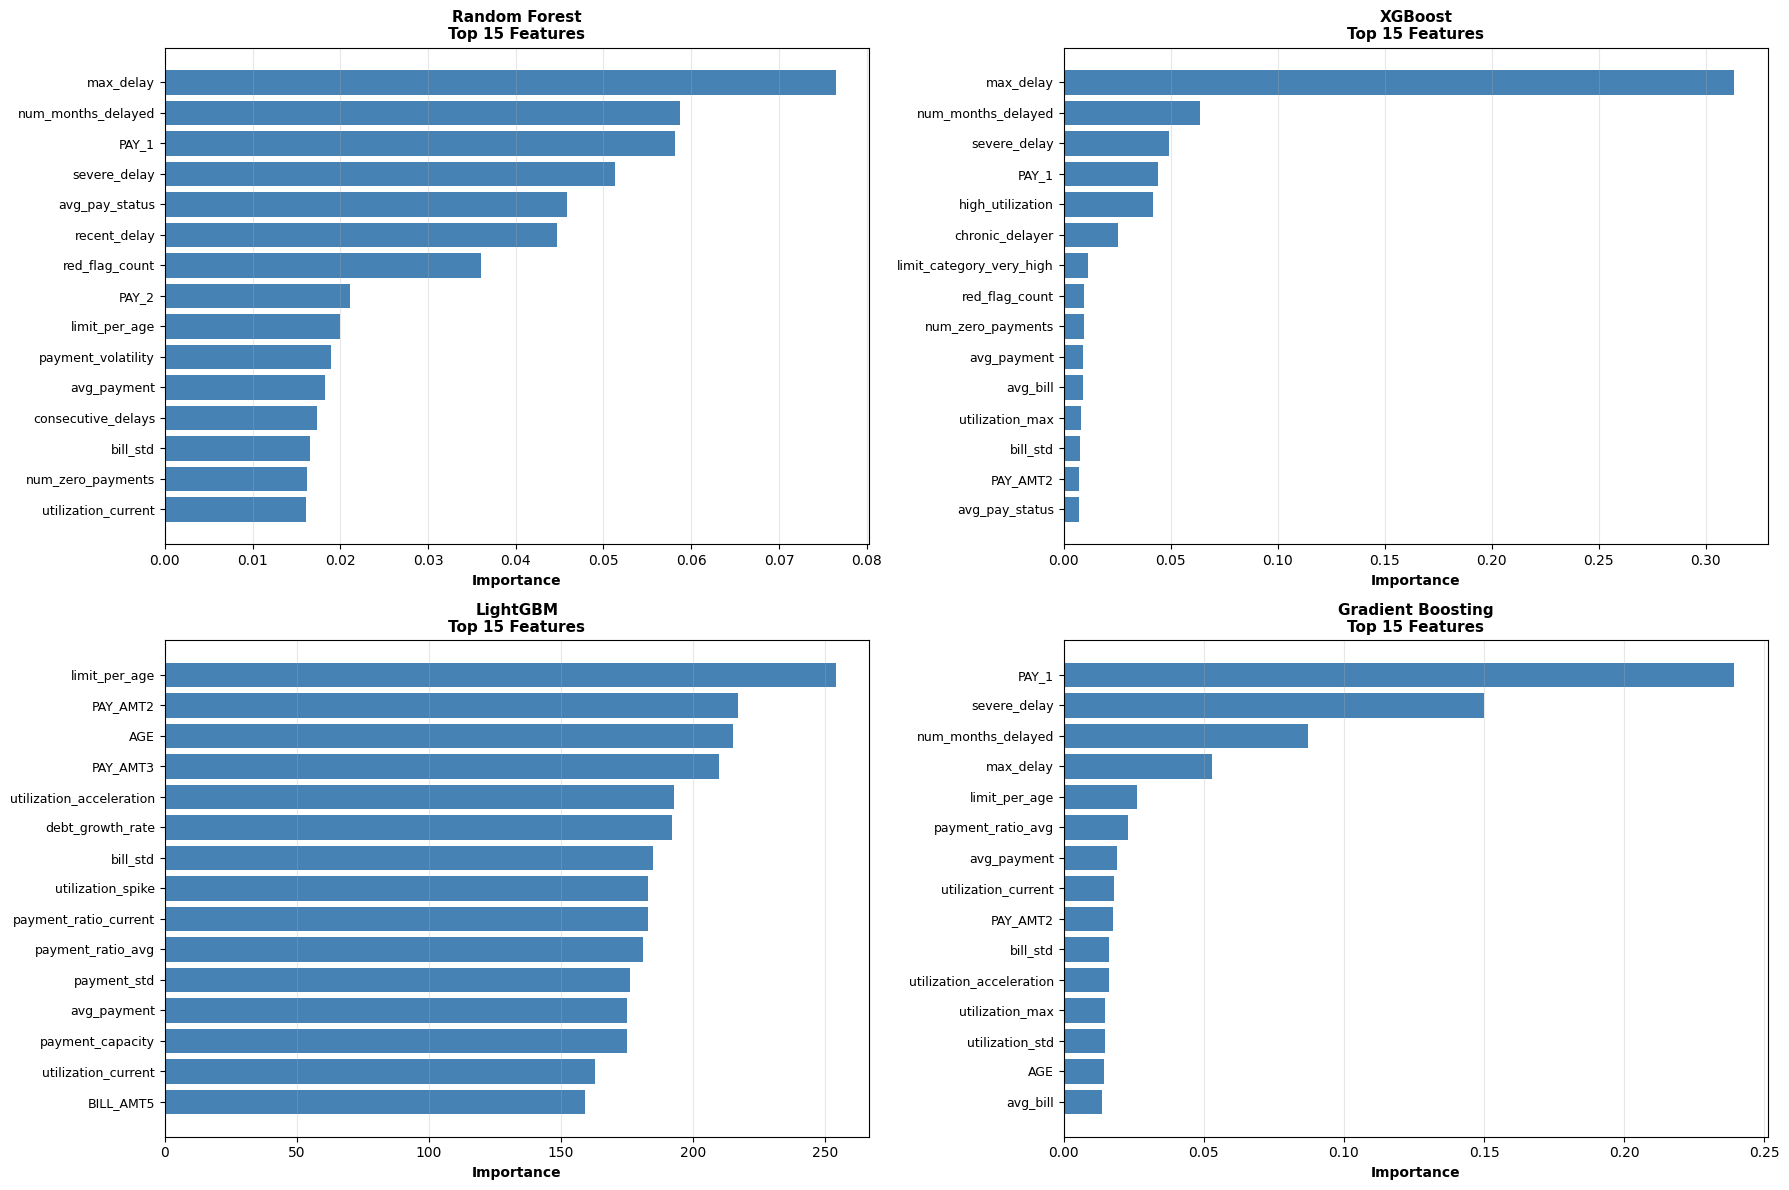


✅ Advanced models training complete!

Next step: Run threshold optimization on these new models


In [ ]:
"""
ADVANCED MODELS: XGBoost & LightGBM
These often outperform standard sklearn models for tabular data
"""

# Install if needed (uncomment in Colab)
# !pip install xgboost lightgbm

import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("="*80)
print("ADVANCED MODELS: XGBoost & LightGBM")
print("="*80)

# ============================================================================
# MODEL 6: XGBoost
# ============================================================================
print("\n" + "="*70)
print("MODEL 6: XGBoost")
print("="*70)

# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"\nClass imbalance ratio: {scale_pos_weight:.2f}")

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # Handle imbalance
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False
)

# Train
print("\nTraining XGBoost...")
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=False
)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Default', 'Default']))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_xgb[0,0]:5d} {cm_xgb[0,1]:5d}")
print(f"Actual Yes   {cm_xgb[1,0]:5d} {cm_xgb[1,1]:5d}")

from sklearn.metrics import recall_score, precision_score, f1_score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"\nROC-AUC:          {roc_auc_xgb:.4f}")
print(f"Recall (Default): {recall_xgb:.4f}")
print(f"Precision:        {precision_xgb:.4f}")
print(f"F1 Score:         {f1_xgb:.4f}")

results['XGBoost'] = {
    'roc_auc': roc_auc_xgb,
    'recall': recall_xgb,
    'precision': precision_xgb,
    'f1': f1_xgb,
    'predictions': y_pred_xgb,
    'probabilities': y_pred_proba_xgb,
    'model': xgb_model
}


# ============================================================================
# MODEL 7: XGBoost with SMOTE
# ============================================================================
print("\n" + "="*70)
print("MODEL 7: XGBoost + SMOTE")
print("="*70)

xgb_smote = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False
)

print("\nTraining XGBoost with SMOTE data...")
xgb_smote.fit(X_train_smote, y_train_smote, verbose=False)

y_pred_xgb_smote = xgb_smote.predict(X_test_scaled)
y_pred_proba_xgb_smote = xgb_smote.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_smote, target_names=['No Default', 'Default']))

cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_xgb_smote[0,0]:5d} {cm_xgb_smote[0,1]:5d}")
print(f"Actual Yes   {cm_xgb_smote[1,0]:5d} {cm_xgb_smote[1,1]:5d}")

roc_auc_xgb_smote = roc_auc_score(y_test, y_pred_proba_xgb_smote)
recall_xgb_smote = recall_score(y_test, y_pred_xgb_smote)
precision_xgb_smote = precision_score(y_test, y_pred_xgb_smote)
f1_xgb_smote = f1_score(y_test, y_pred_xgb_smote)

print(f"\nROC-AUC:          {roc_auc_xgb_smote:.4f}")
print(f"Recall (Default): {recall_xgb_smote:.4f}")
print(f"Precision:        {precision_xgb_smote:.4f}")
print(f"F1 Score:         {f1_xgb_smote:.4f}")

results['XGBoost + SMOTE'] = {
    'roc_auc': roc_auc_xgb_smote,
    'recall': recall_xgb_smote,
    'precision': precision_xgb_smote,
    'f1': f1_xgb_smote,
    'predictions': y_pred_xgb_smote,
    'probabilities': y_pred_proba_xgb_smote,
    'model': xgb_smote
}


# ============================================================================
# MODEL 8: LightGBM
# ============================================================================
print("\n" + "="*70)
print("MODEL 8: LightGBM")
print("="*70)

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42,
    verbose=-1
)

print("\nTraining LightGBM...")
lgb_model.fit(X_train_scaled, y_train)

y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_proba_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb, target_names=['No Default', 'Default']))

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_lgb[0,0]:5d} {cm_lgb[0,1]:5d}")
print(f"Actual Yes   {cm_lgb[1,0]:5d} {cm_lgb[1,1]:5d}")

roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"\nROC-AUC:          {roc_auc_lgb:.4f}")
print(f"Recall (Default): {recall_lgb:.4f}")
print(f"Precision:        {precision_lgb:.4f}")
print(f"F1 Score:         {f1_lgb:.4f}")

results['LightGBM'] = {
    'roc_auc': roc_auc_lgb,
    'recall': recall_lgb,
    'precision': precision_lgb,
    'f1': f1_lgb,
    'predictions': y_pred_lgb,
    'probabilities': y_pred_proba_lgb,
    'model': lgb_model
}


# ============================================================================
# MODEL 9: LightGBM with SMOTE
# ============================================================================
print("\n" + "="*70)
print("MODEL 9: LightGBM + SMOTE")
print("="*70)

lgb_smote = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose=-1
)

print("\nTraining LightGBM with SMOTE data...")
lgb_smote.fit(X_train_smote, y_train_smote)

y_pred_lgb_smote = lgb_smote.predict(X_test_scaled)
y_pred_proba_lgb_smote = lgb_smote.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb_smote, target_names=['No Default', 'Default']))

cm_lgb_smote = confusion_matrix(y_test, y_pred_lgb_smote)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No    {cm_lgb_smote[0,0]:5d} {cm_lgb_smote[0,1]:5d}")
print(f"Actual Yes   {cm_lgb_smote[1,0]:5d} {cm_lgb_smote[1,1]:5d}")

roc_auc_lgb_smote = roc_auc_score(y_test, y_pred_proba_lgb_smote)
recall_lgb_smote = recall_score(y_test, y_pred_lgb_smote)
precision_lgb_smote = precision_score(y_test, y_pred_lgb_smote)
f1_lgb_smote = f1_score(y_test, y_pred_lgb_smote)

print(f"\nROC-AUC:          {roc_auc_lgb_smote:.4f}")
print(f"Recall (Default): {recall_lgb_smote:.4f}")
print(f"Precision:        {precision_lgb_smote:.4f}")
print(f"F1 Score:         {f1_lgb_smote:.4f}")

results['LightGBM + SMOTE'] = {
    'roc_auc': roc_auc_lgb_smote,
    'recall': recall_lgb_smote,
    'precision': precision_lgb_smote,
    'f1': f1_lgb_smote,
    'predictions': y_pred_lgb_smote,
    'probabilities': y_pred_proba_lgb_smote,
    'model': lgb_smote
}


# ============================================================================
# UPDATED COMPARISON (fixed KeyError)
# ============================================================================
print("\n\n" + "="*80)
print("COMPLETE MODEL COMPARISON (All 9 Models)")
print("="*80)

comparison_df = pd.DataFrame([{
    'Model': k,
    'ROC-AUC': v.get('roc_auc', np.nan),
    'Recall': v.get('recall', np.nan),
    'Precision': v.get('precision', np.nan),
    'F1 Score': v.get('f1', np.nan)
} for k, v in results.items()])

comparison_df = comparison_df.sort_values('ROC-AUC', ascending=False)
print("\n", comparison_df.to_string(index=False))

# Best model
best_model_name = comparison_df.iloc[0]['Model']
best_roc_auc = comparison_df.iloc[0]['ROC-AUC']
best_recall = comparison_df.iloc[0]['Recall']

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"ROC-AUC:          {best_roc_auc:.4f}")
print(f"Recall (Default): {best_recall:.4f}")
print(f"Precision:        {comparison_df.iloc[0]['Precision']:.4f}")
print(f"F1 Score:         {comparison_df.iloc[0]['F1 Score']:.4f}")


# ============================================================================
# FEATURE IMPORTANCE COMPARISON
# ============================================================================
print("\n\n" + "="*80)
print("FEATURE IMPORTANCE COMPARISON")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

models_to_plot = ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']

for idx, model_name in enumerate(models_to_plot):
    if model_name in results and 'model' in results[model_name]:
        ax = axes[idx]
        model = results[model_name]['model']

        # Get feature importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_imp = pd.DataFrame({
                'feature': X.columns,
                'importance': importances
            }).sort_values('importance', ascending=False).head(15)

            # Plot
            ax.barh(range(len(feature_imp)), feature_imp['importance'], color='steelblue')
            ax.set_yticks(range(len(feature_imp)))
            ax.set_yticklabels(feature_imp['feature'], fontsize=9)
            ax.set_xlabel('Importance', fontweight='bold', fontsize=10)
            ax.set_title(f'{model_name}\nTop 15 Features', fontweight='bold', fontsize=11)
            ax.invert_yaxis()
            ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance_comparison_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Advanced models training complete!")
print("\nNext step: Run threshold optimization on these new models")